# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

# 2020-09-06T1846Z default API https://coronavirus-tracker-api.herokuapp.com/v2 down, alternative https://covid-tracker-us.herokuapp.com/v2 up
covid19 = COVID19Py.COVID19('https://covid-tracker-us.herokuapp.com')
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('621718d3.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-11-08T1558Z data: 621718d3.pkl
    # 2020-11-08T0255Z data: a23eff06.pkl
    # 2020-11-03T0101Z data: 72a3f4db.pkl
    # 2020-10-28T1139Z data: 7c322f53.pkl
    # 2020-10-21T1343Z data: 173b7204.pkl
    # 2020-10-14T1146Z data: 1678e786.pkl
    # 2020-10-02T0750Z data: 6034799e.pkl
    # 2020-09-06T1848Z data: e3e48d96.pkl
    # 2020-07-30T1354Z data: c6b11935.pkl
    # 2020-07-15T1438Z data: 02afa4cd.pkl
    # 2020-06-22T1249Z data: 2fa5652b.pkl
    # 2020-06-20T0529Z data: 30a2be6c.pkl
    # 2020-06-03T0604Z data: 3349596c.pkl
    # 2020-05-30T0158Z data: 74ef0466.pkl
    # 2020-05-25T0106Z data: a7180674.pkl
    # 2020-05-18T1412Z data: 411d8cc3.pkl
    # 2020-05-11T1410Z data: 6d5e6f10.pkl
    # 2020-05-03T1505Z data: b3e37289.pkl
    # 2020-04-30T1228Z data: e755d4a0.pkl
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-11-08T15:37:14.768276Z   
1  2020-11-08T15:37:14.799815Z   
2  2020-11-08T15:37:14.824139Z   
3  2020-11-08T15:37:14.846977Z   
4  2020-11-08T15:37:14.870554Z   

                                         coordinates  \
0  {'latitude': '33.93911', 'longitude': '67.7099...   
1    {'latitude': '41.1533', 'longitude': '20.1683'}   
2     {'latitude': '28.0339', 'longitude': '1.6596'}   
3     {'latitude': '42.5063', 'longitude': '1.5218'}   
4   {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 42033, 'deaths': 1556, 'recovere...   
1  {'confirmed': 23705, 'deaths': 557, 'recovered...   
2  {'confirmed': 61381, 'deaths': 2036, 'recovere...   
3  {'confirmed': 5319, 'deaths': 75, 'recovered':...   
4  {'confirmed': 12335, 'deaths': 303, 'recovered...   

                                           timelines  
0  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
1  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
2  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
3  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
4  {'confirmed': {'timeline': {'2020-01-22T00:00:...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indones

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
286      26925     474       NaN                     0.440184   
287      27050     475       NaN                     0.464253   
288      27195     476       NaN                     0.536044   
289      27284     477       NaN                     0.327266   
290      27427     478       NaN                     0.524117   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
286                                        2914.266097                 
287                                        3073.616735                 
288                                        3548.919463                 
289                                        2166.687883                 
290                                        3469.951524                 

     deaths_percentage_change  \
286                  0.423729   
287                  0.210970   
288                  0.210526   
289                  0.210084   
290                  0.209644   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
286                                        2805.326460           
287                                        1396.744820           
288                                        1393.804305           
289                                        1390.876144           
290                                        1387.960261           

     confirmed_new_cases  deaths_new_cases  
286                118.0               2.0  
287                125.0               1.0  
288                145.0               1.0  
289                 89.0               1.0  
290                143.0               1.0

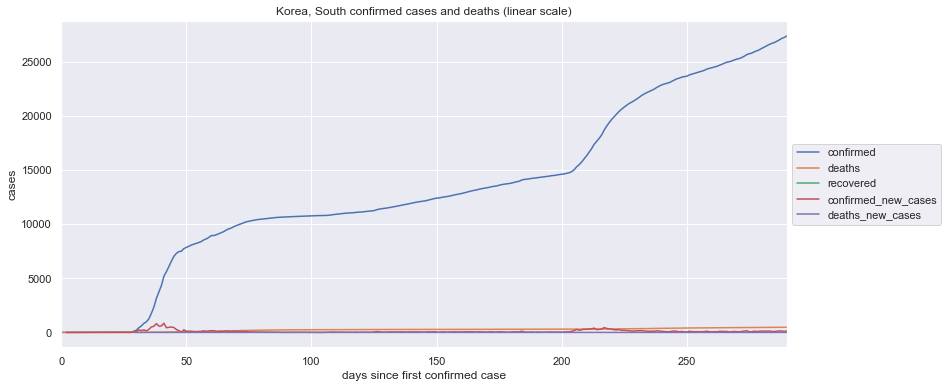

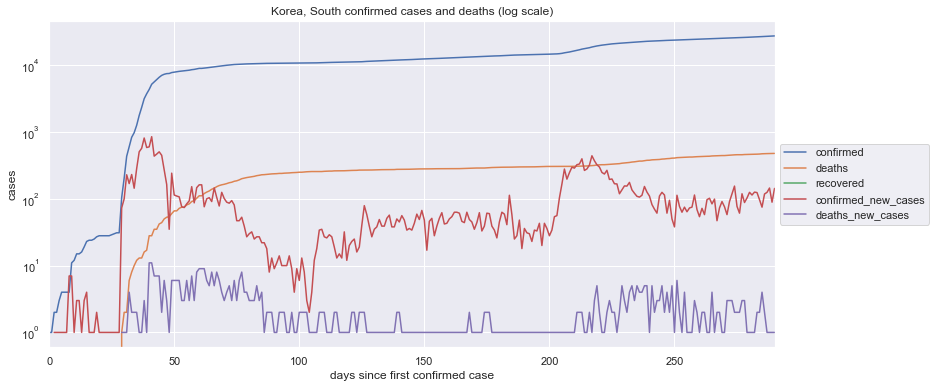

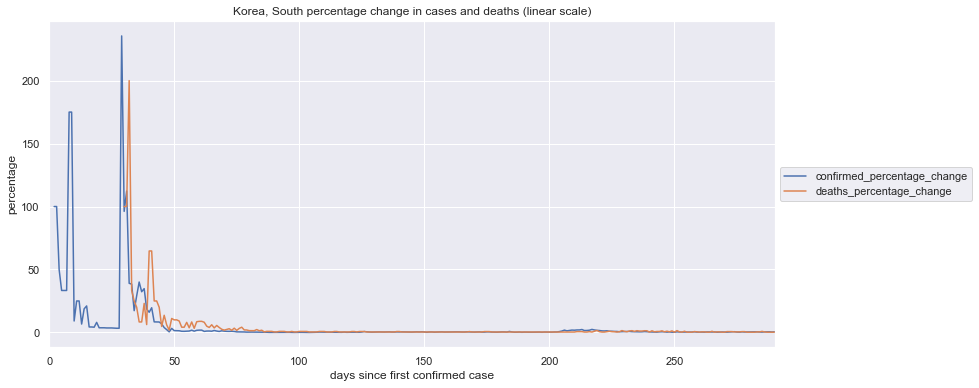

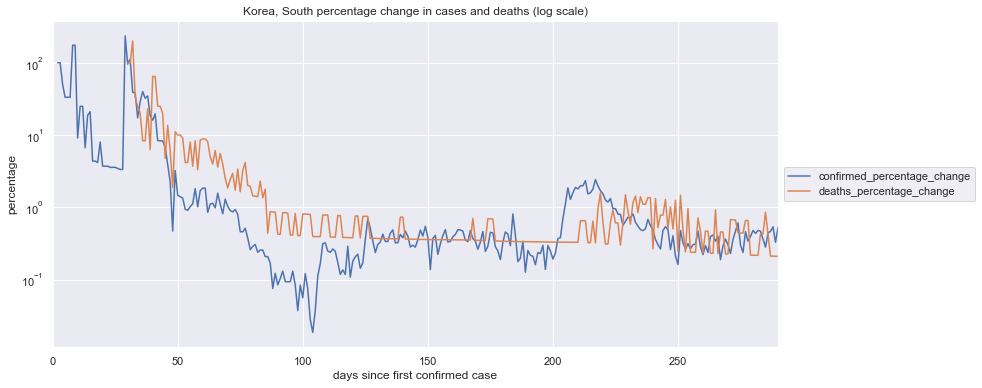

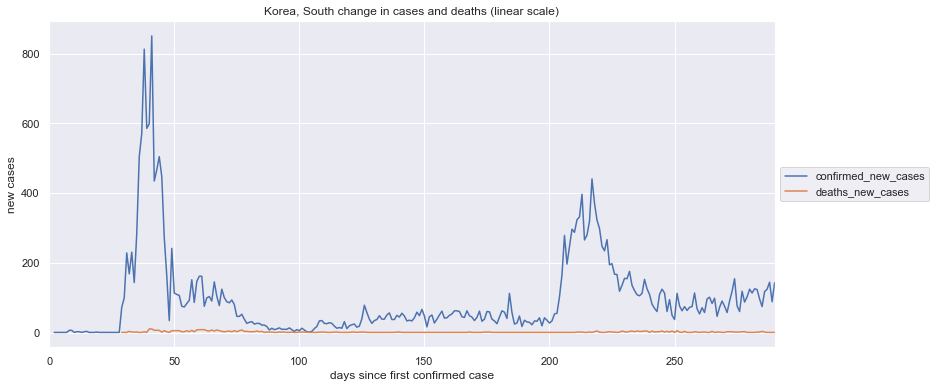

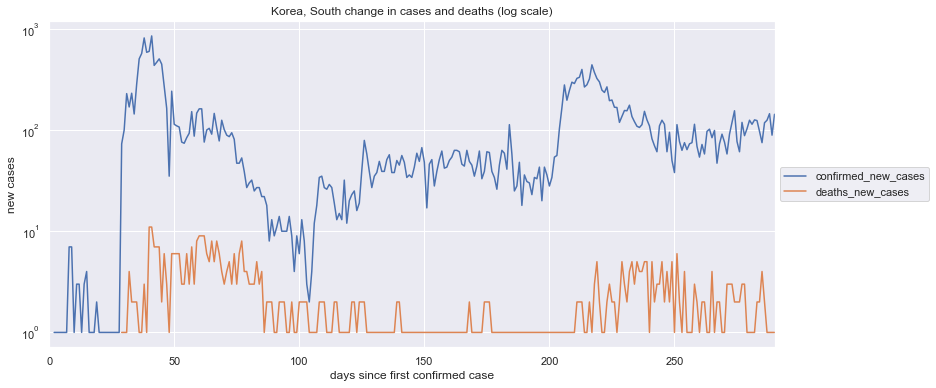

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths  recovered  confirmed_percentage_change  \
273     452541   12126      26661                     1.159258   
274     468213   12331      27334                     3.463112   
275     479341   12520      27987                     2.376696   
276     488044   12708      28613                     1.815618   
277     494168   12907      29357                     1.254805   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
273                                       44316.680301                 
274                                      132389.485580                 
275                                       90857.472867                 
276                                       69408.300376                 
277                                       47969.280886                 

     deaths_percentage_change  \
273                  2.260078   
274                  1.690582   
275                  1.532722   
276                  1.501597   
277                  1.565943   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
273                                       86399.325466           
274                                       64628.384636           
275                                       58593.644298           
276                                       57403.784351           
277                                       59863.606035           

     confirmed_new_cases  deaths_new_cases  
273               5186.0             268.0  
274              15672.0             205.0  
275              11128.0             189.0  
276               8703.0             188.0  
277               6124.0             199.0

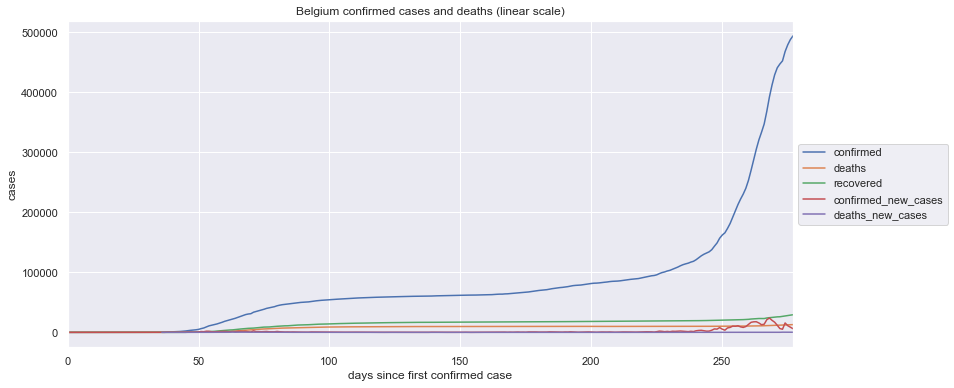

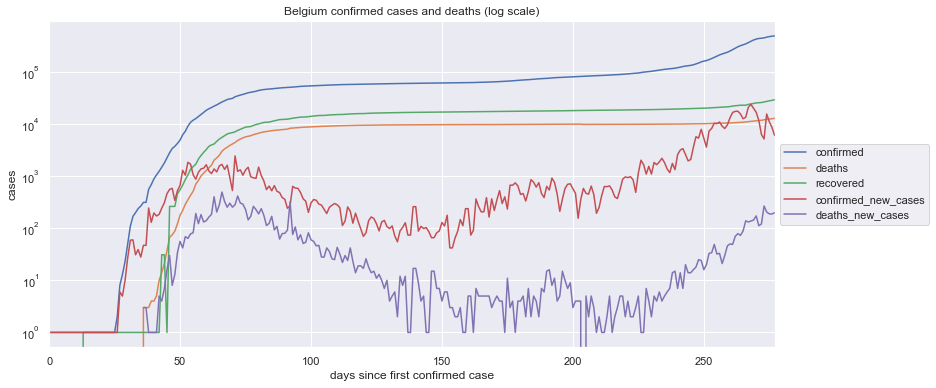

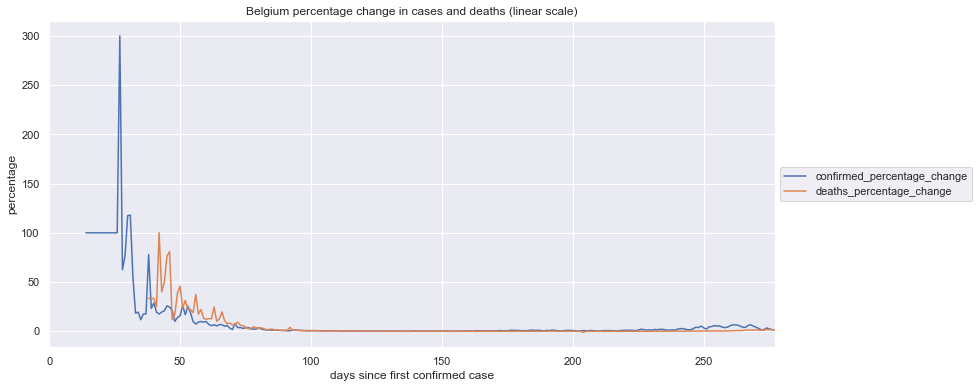

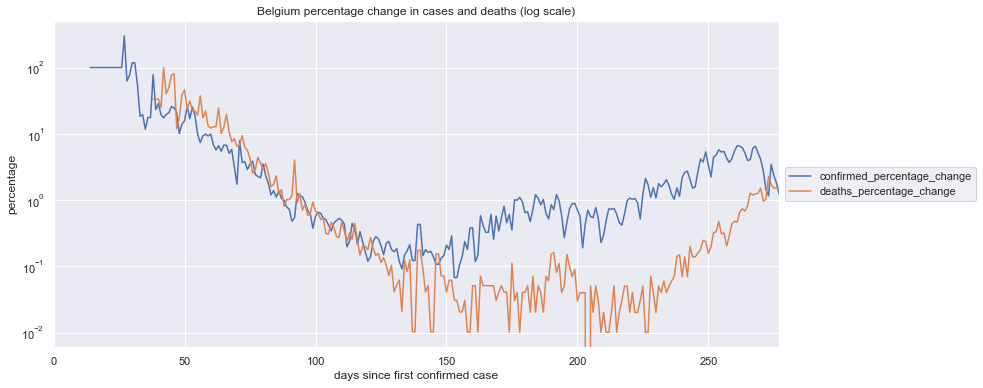

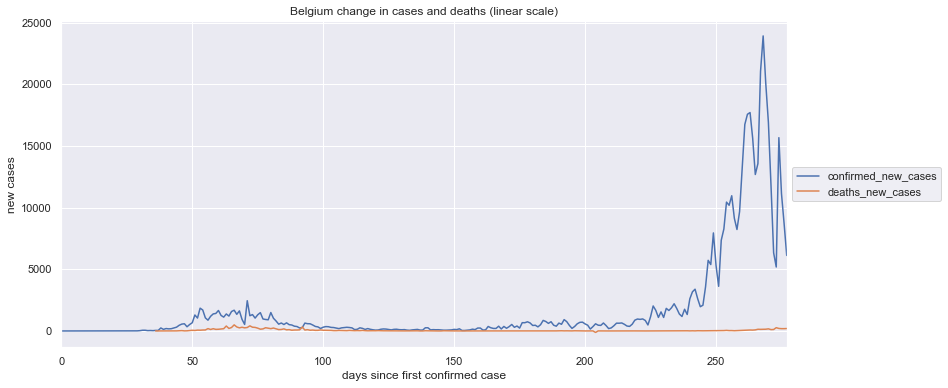

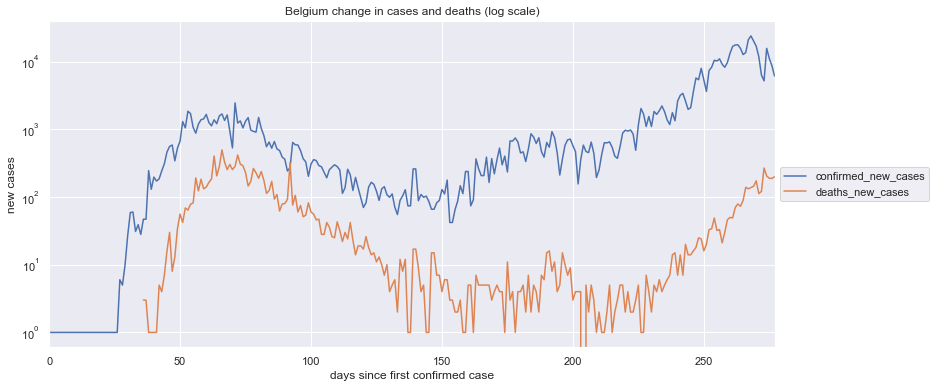

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
252     182303    2471       NaN                     3.477185   
253     192376    2555       NaN                     5.525416   
254     202504    2628       NaN                     5.264690   
255     211913    2710       NaN                     4.646328   
256     211913    2749       NaN                          NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
252                                       62266.570937                 
253                                       98944.620213                 
254                                       94275.744279                 
255                                       83202.625298                 
256                                                NaN                 

     deaths_percentage_change  \
252                  2.787022   
253                  3.399433   
254                  2.857143   
255                  3.120244   
256                  1.439114   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
252                                       49907.694364           
253                                       60874.261850           
254                                       51163.367698           
255                                       55874.758483           
256                                       25770.478564           

     confirmed_new_cases  deaths_new_cases  
252               6126.0              67.0  
253              10073.0              84.0  
254              10128.0              73.0  
255               9409.0              82.0  
256                  NaN              39.0

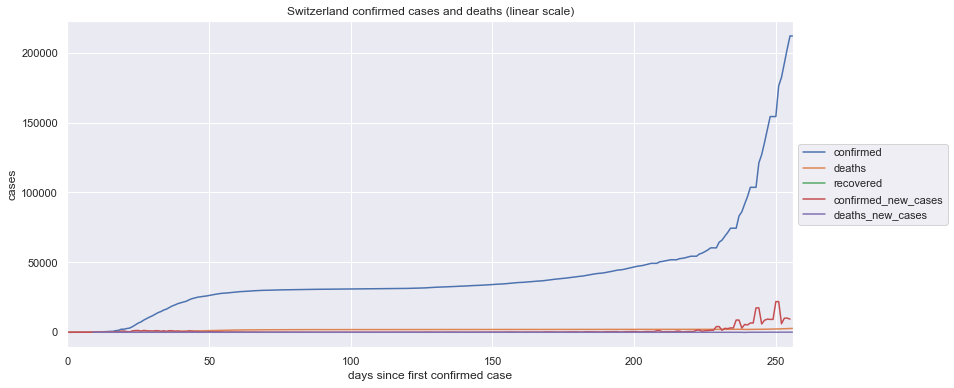

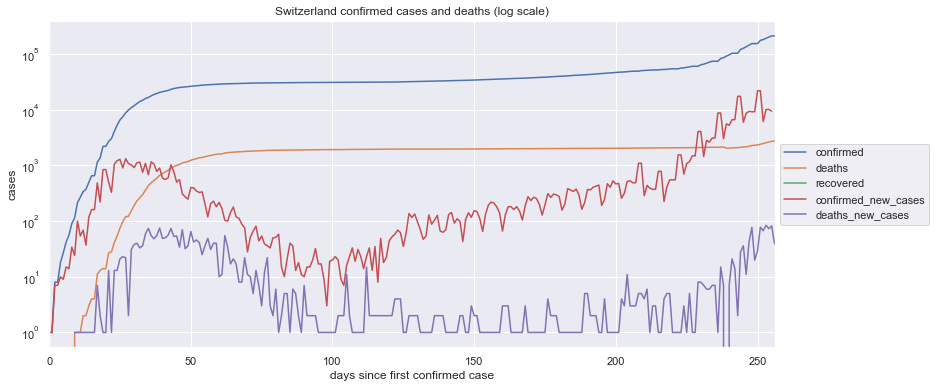

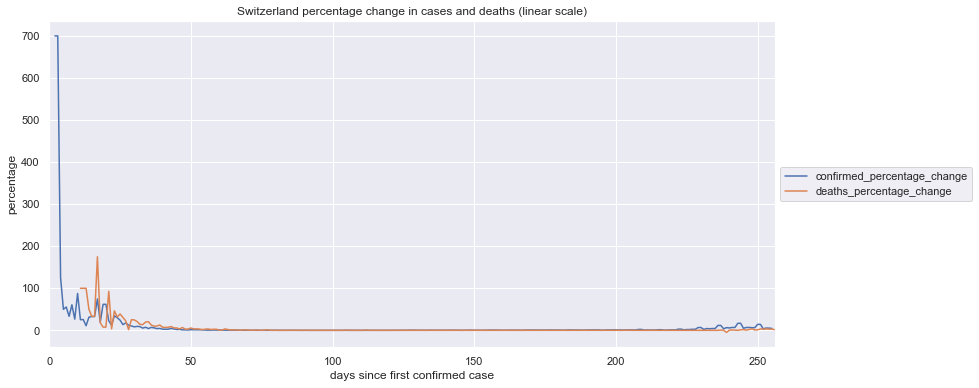

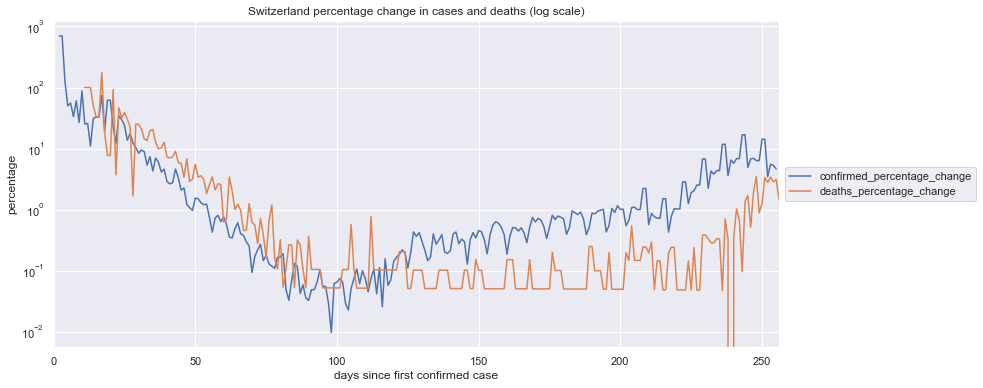

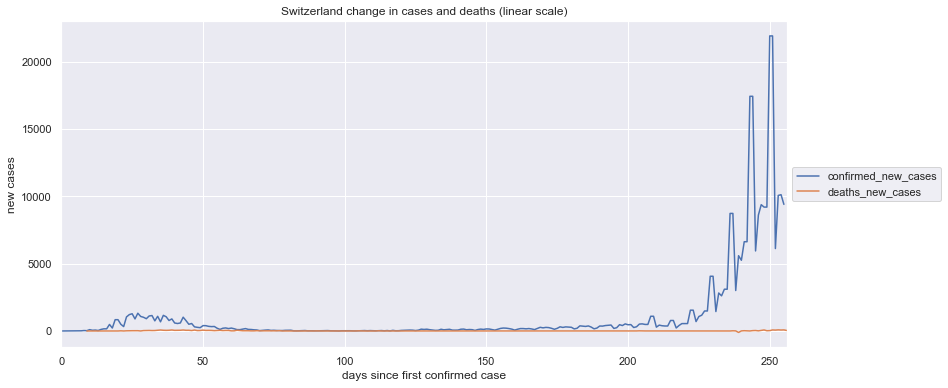

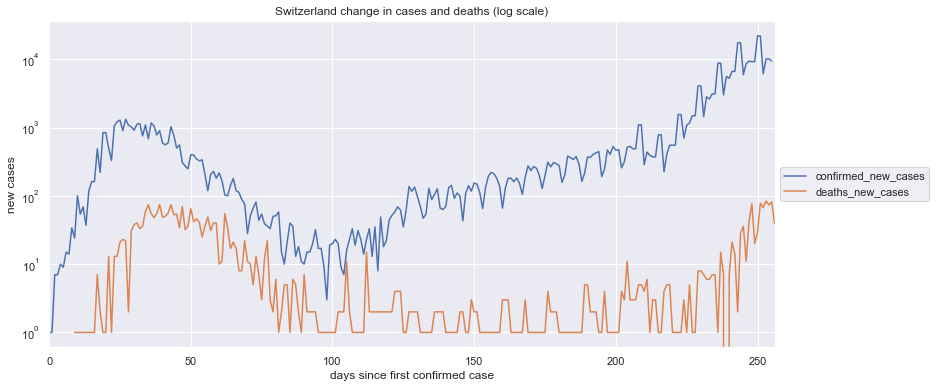

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
251      44246     655       NaN                     5.147338   
252      46892     673       NaN                     5.980202   
253      49807     702       NaN                     6.216412   
254      52254     715       NaN                     4.912964   
255      54809     749       NaN                     4.889578   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
251                                       19109.714927                 
252                                       22201.755322                 
253                                       23078.697251                 
254                                       18239.590041                 
255                                       18152.767732                 

     deaths_percentage_change  \
251                  2.024922   
252                  2.748092   
253                  4.309064   
254                  1.851852   
255                  4.755245   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
251                                        7517.610346           
252                                       10202.408122           
253                                       15997.584800           
254                                        6875.079547           
255                                       17654.050417           

     confirmed_new_cases  deaths_new_cases  
251               2166.0              13.0  
252               2646.0              18.0  
253               2915.0              29.0  
254               2447.0              13.0  
255               2555.0              34.0

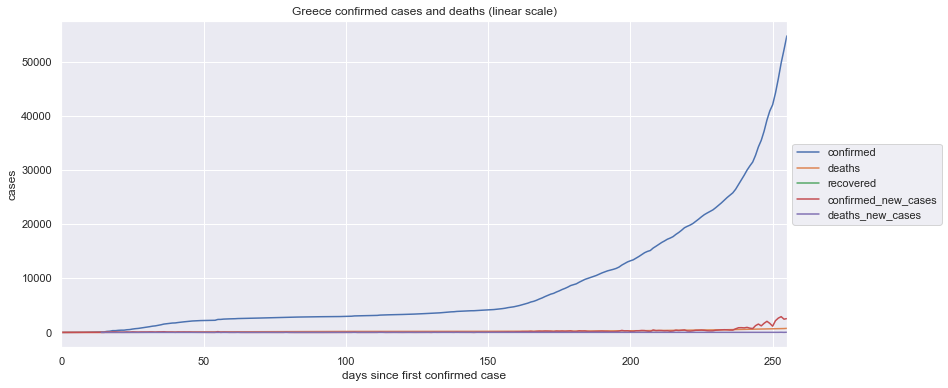

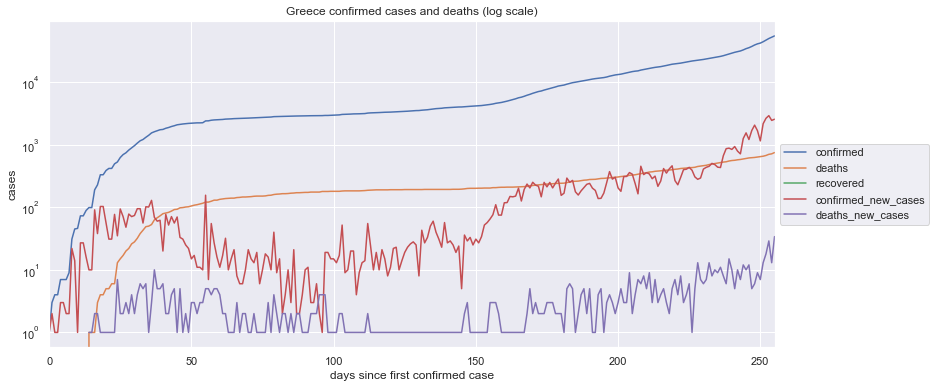

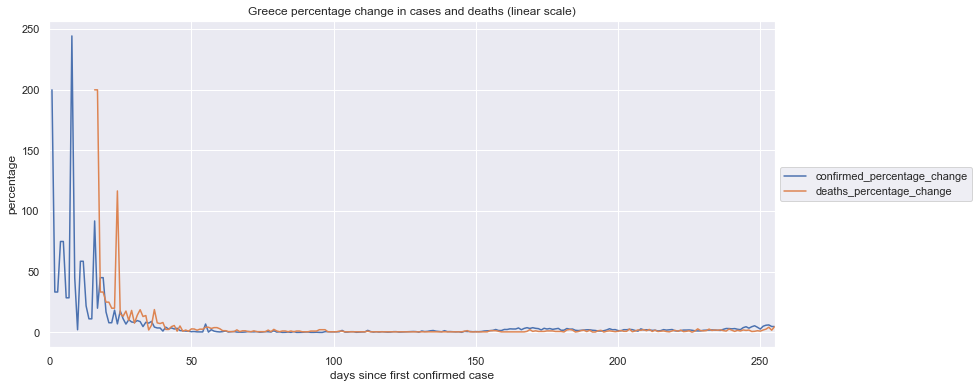

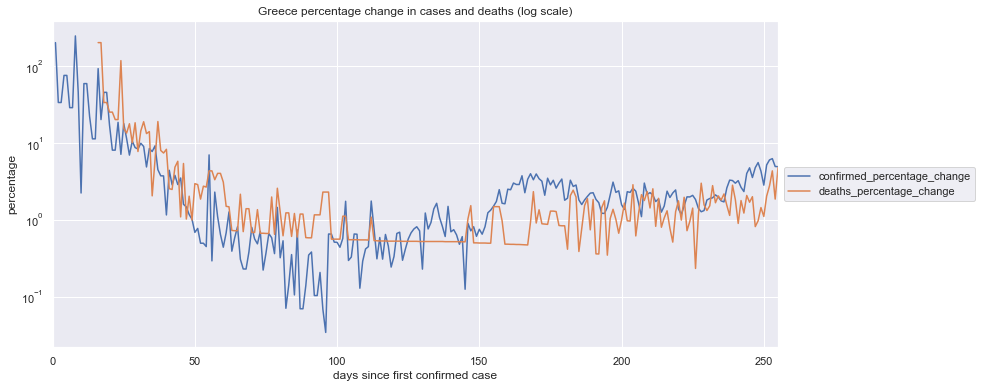

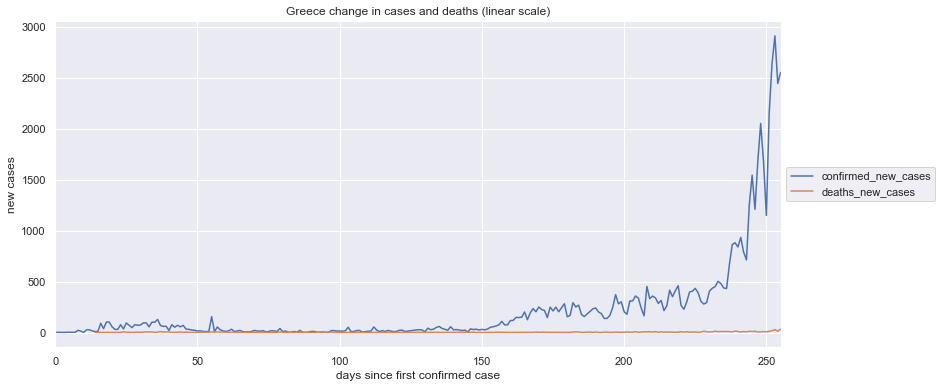

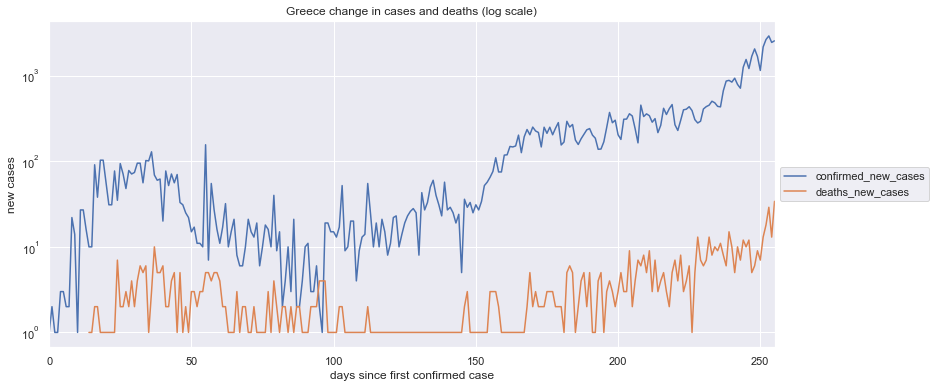

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
251      21956     282       NaN                     2.891419   
252      22578     282       NaN                     2.832939   
253      23229     284       NaN                     2.883338   
254      23835     285       NaN                     2.608808   
255      24243     285       NaN                     1.711768   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
251                                       11921.163483                 
252                                       11680.050103                 
253                                       11887.843060                 
254                                       10755.971761                 
255                                        7057.527028                 

     deaths_percentage_change  \
251                  0.709220   
252                  0.709220   
253                  0.709220   
254                  0.352113   
255                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
251                                        2924.074480           
252                                        2924.074480           
253                                        2924.074480           
254                                        1451.741203           
255                                                NaN           

     confirmed_new_cases  deaths_new_cases  
251                617.0               2.0  
252                622.0               2.0  
253                651.0               2.0  
254                606.0               1.0  
255                408.0               NaN

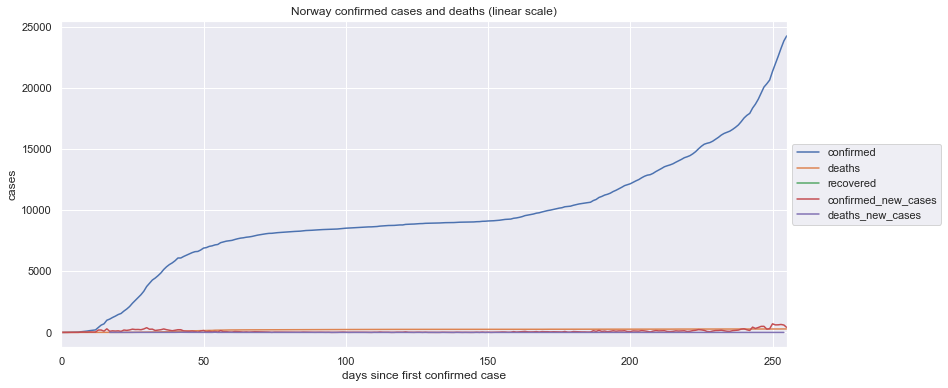

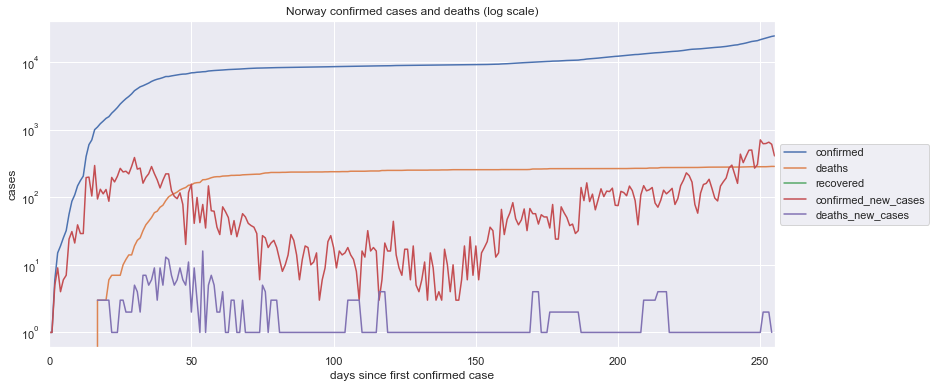

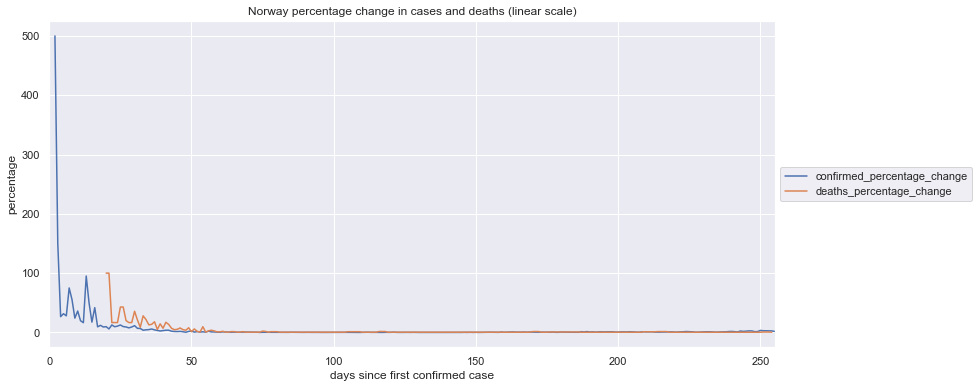

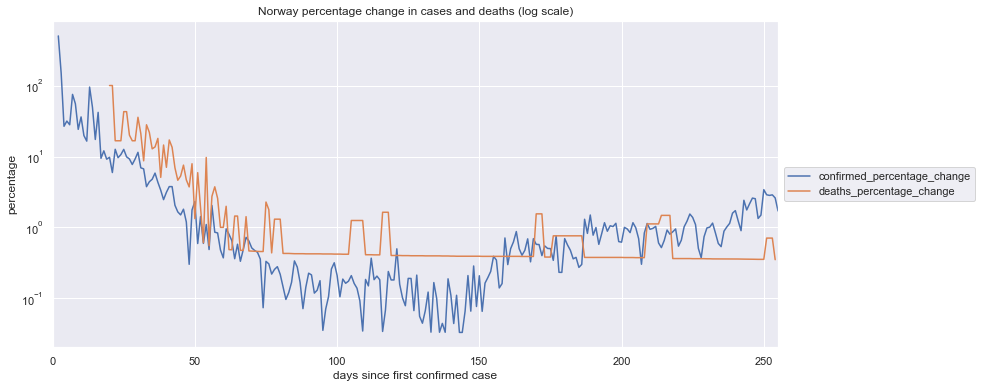

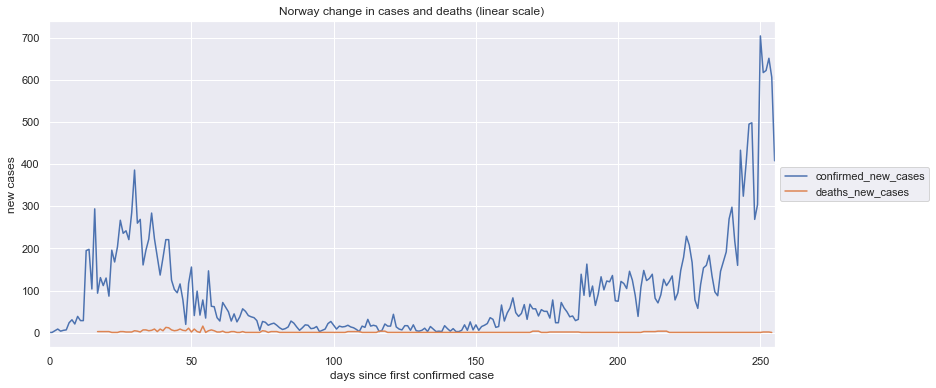

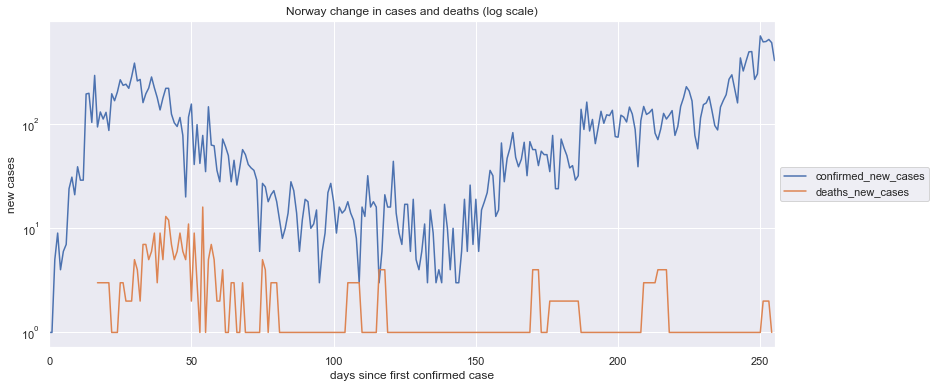

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

confirmed  deaths  recovered  confirmed_percentage_change  \
252     118198    1192      74292                     3.667906   
253     125099    1227      77036                     5.838508   
254     132515    1268      80604                     5.928105   
255     138979    1340      83707                     4.877938   
256     147220    1377      88273                     5.929673   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
252                                       43098.377511                 
253                                       68603.234540                 
254                                       69656.007172                 
255                                       57316.412554                 
256                                       69674.430054                 

     deaths_percentage_change  \
252                  2.847282   
253                  2.936242   
254                  3.341483   
255                  5.678233   
256                  2.761194   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
252                                       33455.936952           
253                                       34501.222353           
254                                       39262.865033           
255                                       66719.984390           
256                                       32444.390419           

     confirmed_new_cases  deaths_new_cases  
252               4182.0              33.0  
253               6901.0              35.0  
254               7416.0              41.0  
255               6464.0              72.0  
256               8241.0              37.0

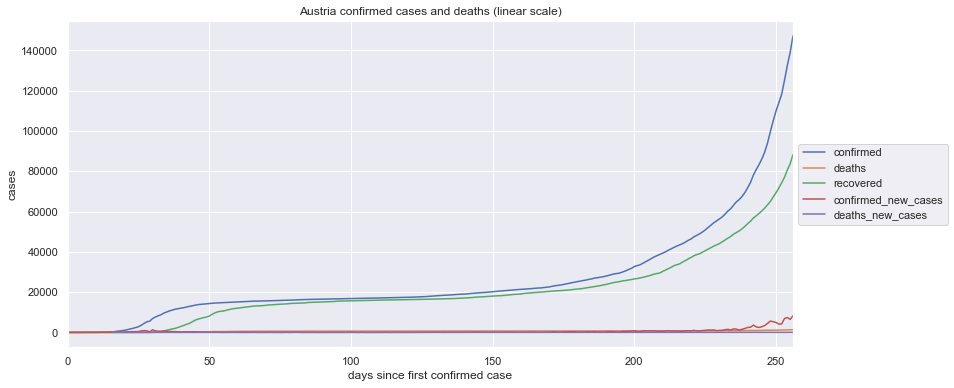

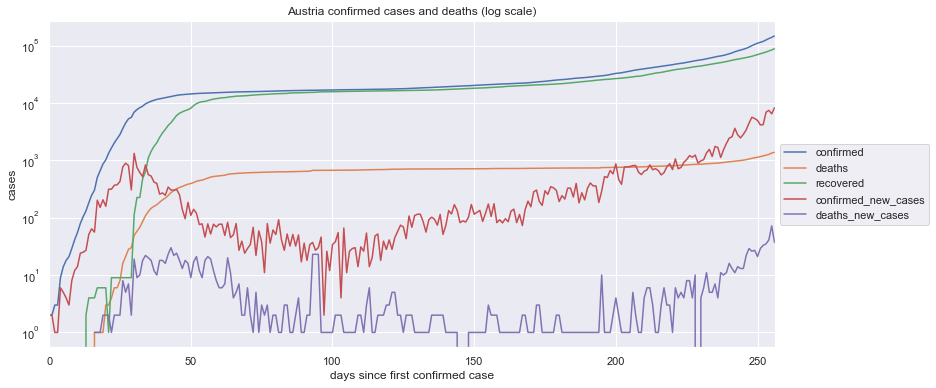

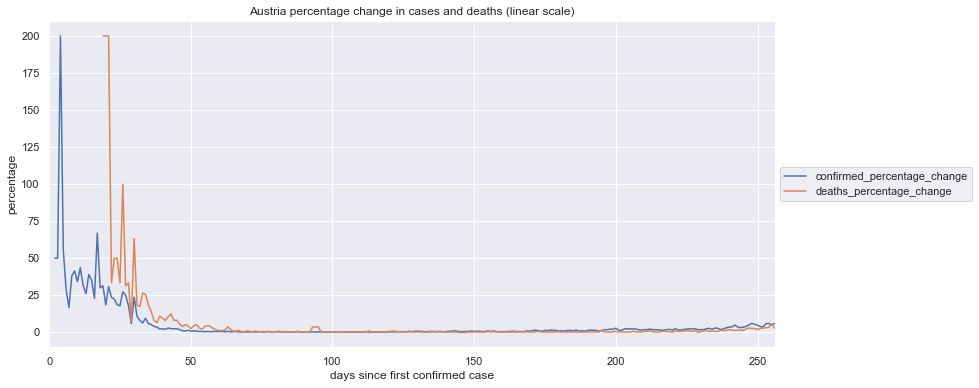

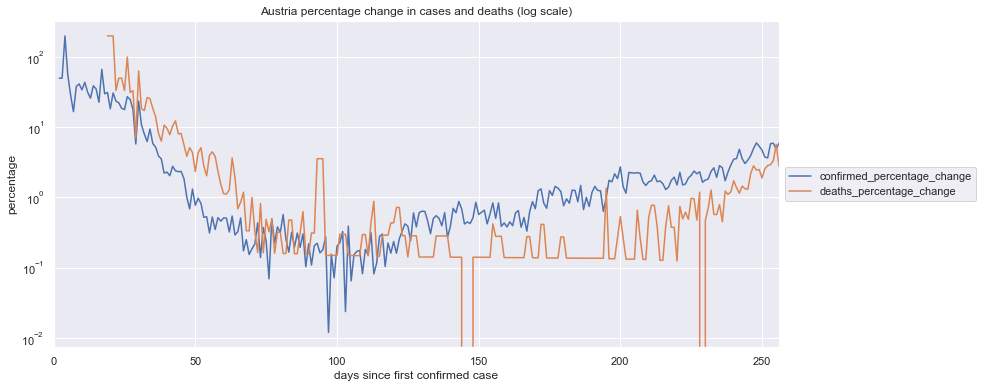

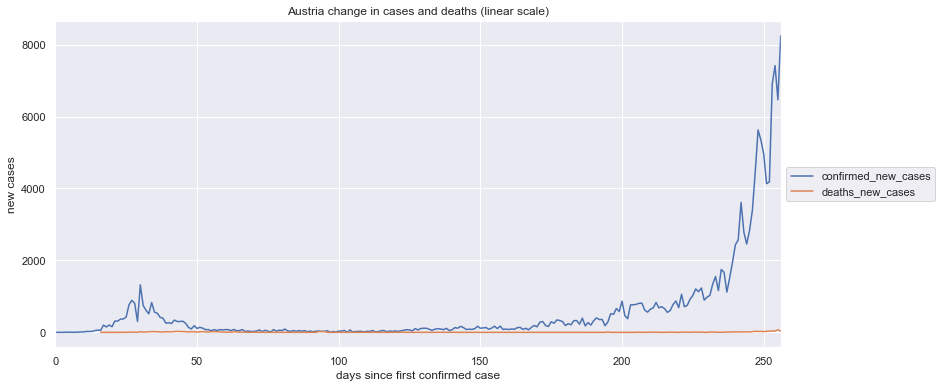

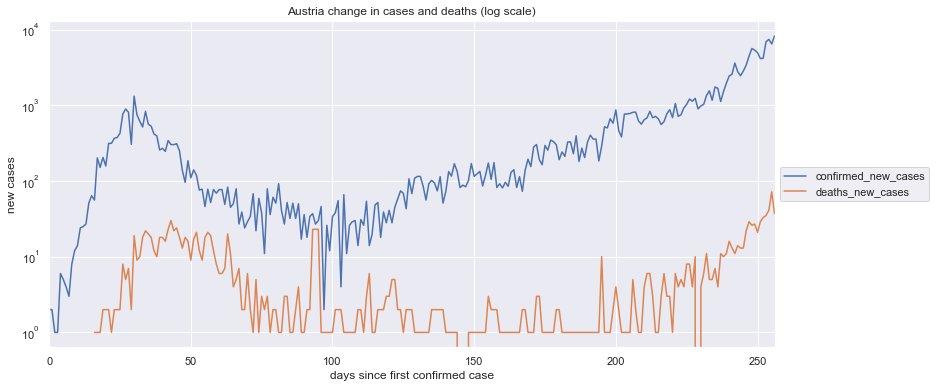

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
276     134532    5989       NaN                     8.183829   
277     137730    5997       NaN                     2.377130   
278     141764    6002       NaN                     2.928919   
279     146461    6022       NaN                     3.313253   
280     146461    6022       NaN                          NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
276                                      205534.913672                 
277                                       59701.046377                 
278                                       73559.103670                 
279                                       83211.563781                 
280                                                NaN                 

     deaths_percentage_change  \
276                  0.033406   
277                  0.133578   
278                  0.083375   
279                  0.333222   
280                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
276                                         838.976545           
277                                        3354.785492           
278                                        2093.943879           
279                                        8368.798030           
280                                                NaN           

     confirmed_new_cases  deaths_new_cases  
276              10177.0               2.0  
277               3198.0               8.0  
278               4034.0               5.0  
279               4697.0              20.0  
280                  NaN               NaN

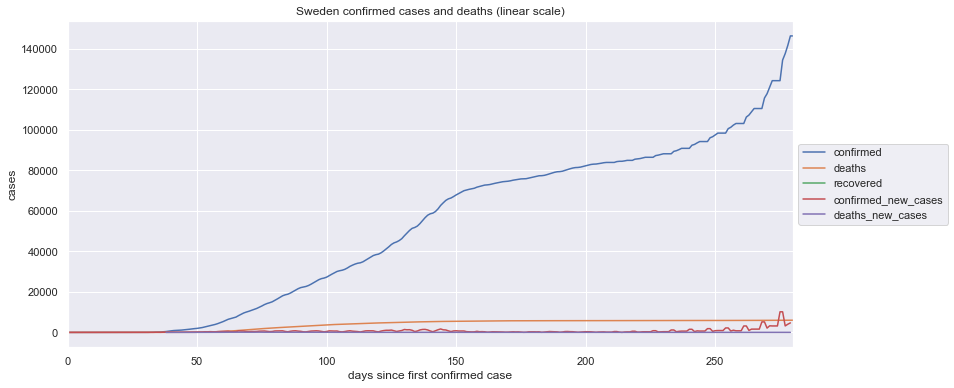

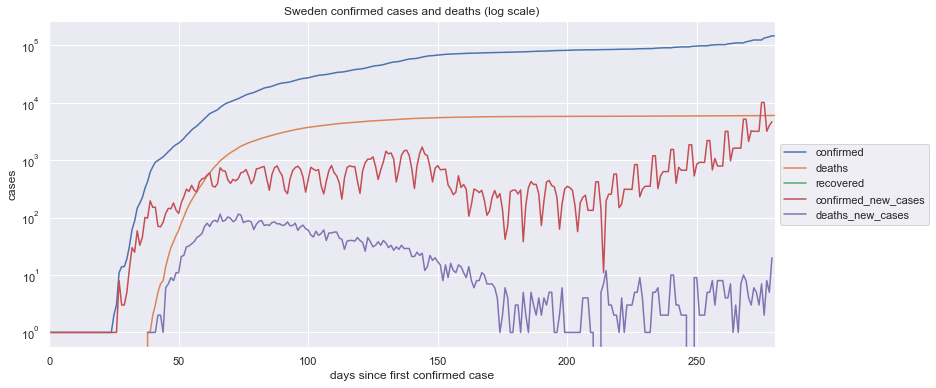

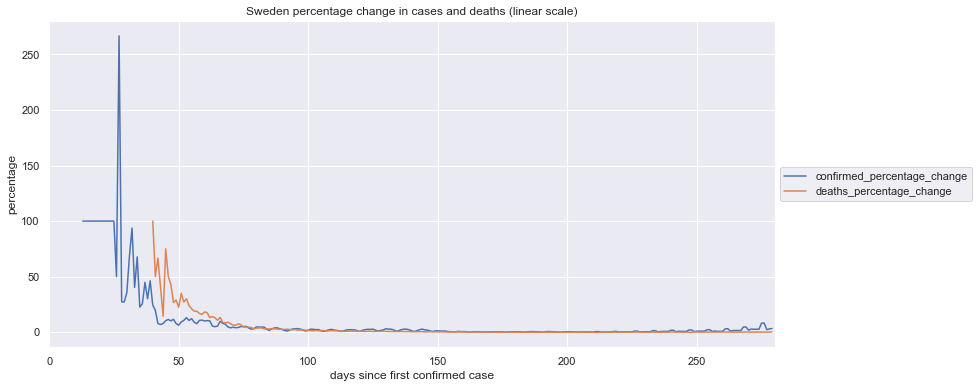

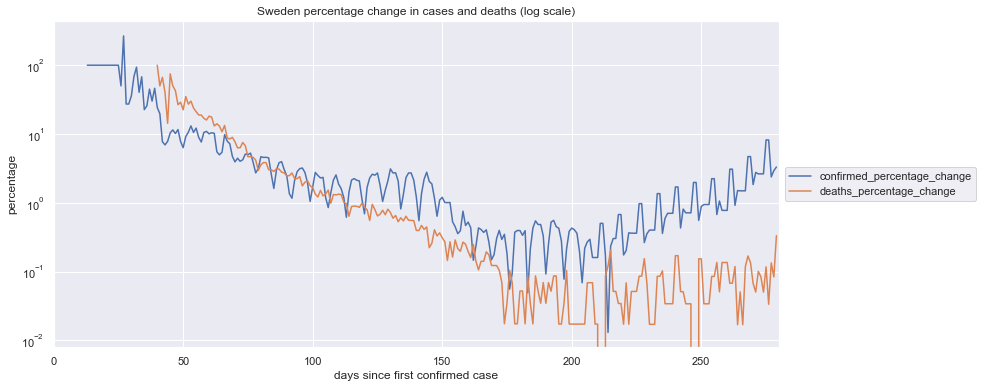

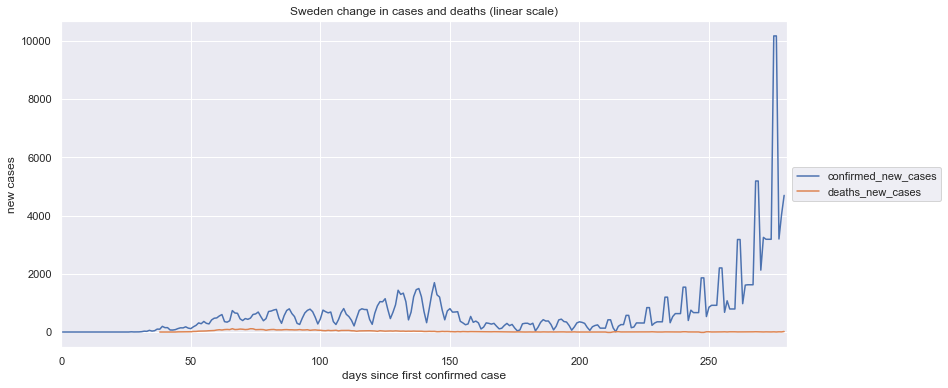

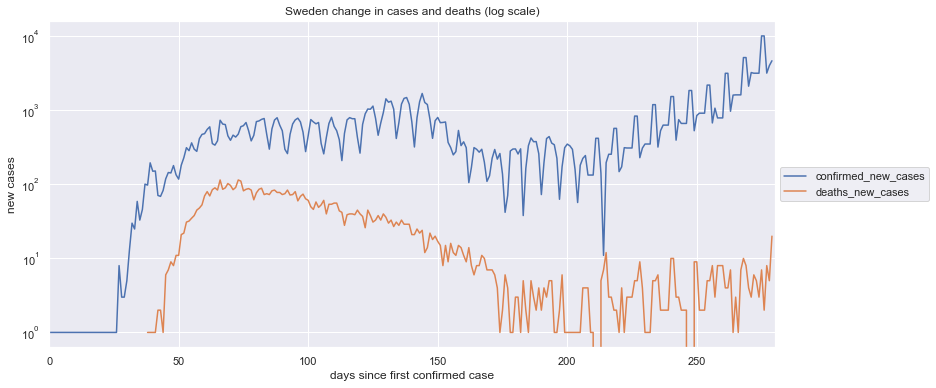

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
248      63048    1922       NaN                     0.474900   
249      63483    1930       NaN                     0.689951   
250      64046    1933       NaN                     0.886852   
251      64538    1940       NaN                     0.768198   
252      64855    1945       NaN                     0.491183   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
248                                        5240.181553                 
249                                        7613.103647                 
250                                        9785.764341                 
251                                        8476.506351                 
252                                        5419.853649                 

     deaths_percentage_change  \
248                  0.260824   
249                  0.416233   
250                  0.155440   
251                  0.362131   
252                  0.257732   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
248                                        2878.005977           
249                                        4592.830349           
250                                        1715.172266           
251                                        3995.857444           
252                                        2843.885287           

     confirmed_new_cases  deaths_new_cases  
248                298.0               5.0  
249                435.0               8.0  
250                563.0               3.0  
251                492.0               7.0  
252                317.0               5.0

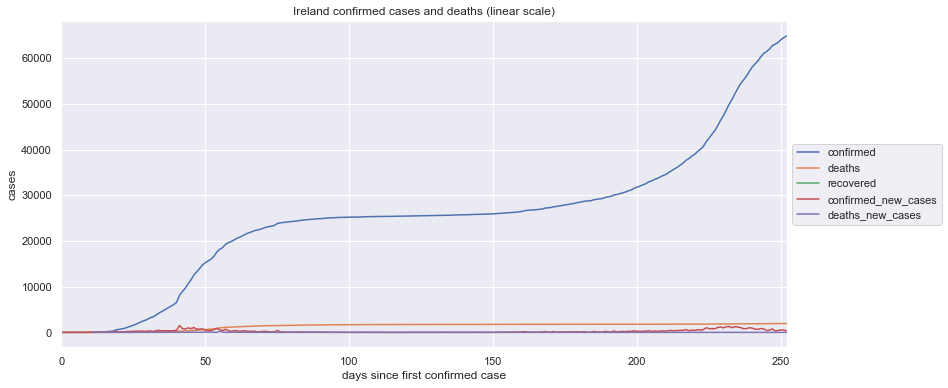

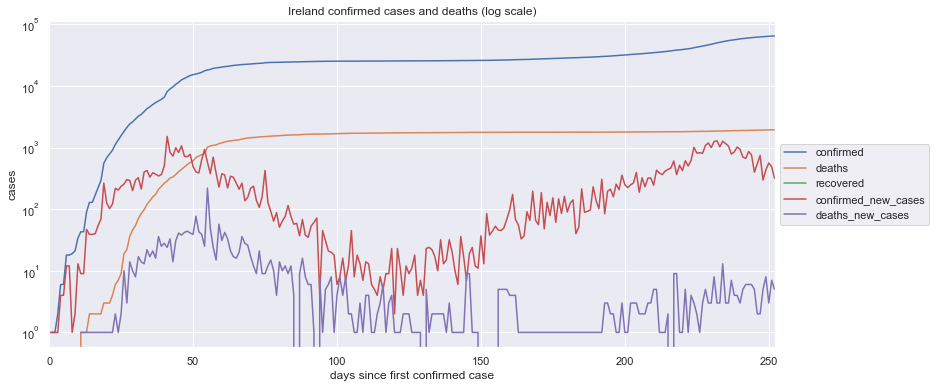

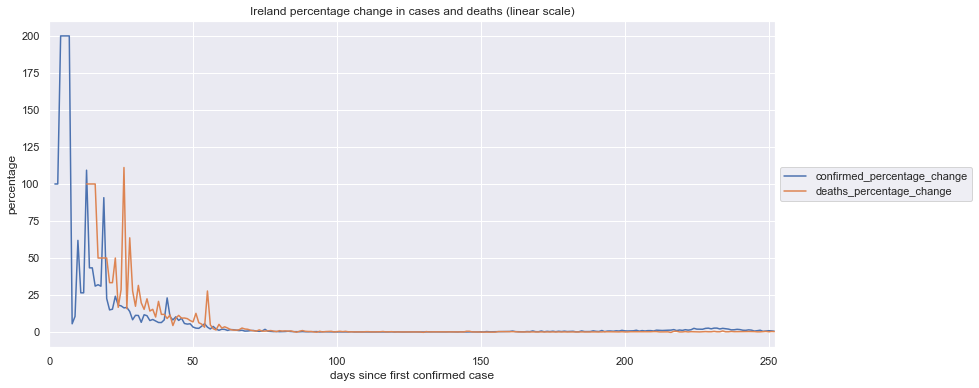

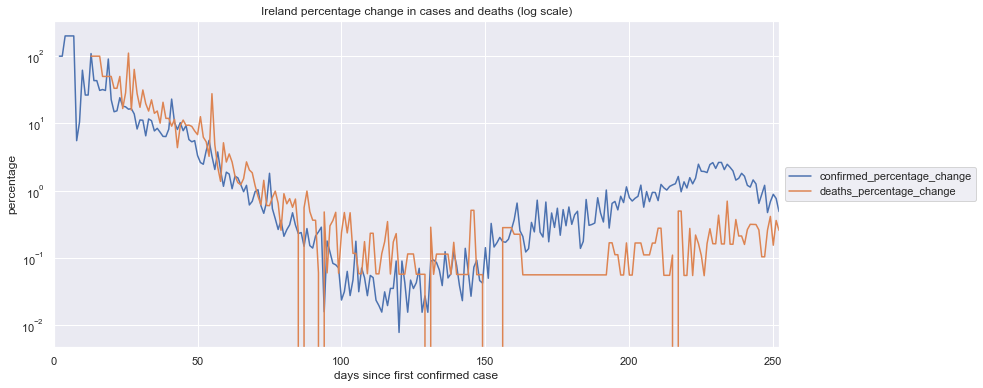

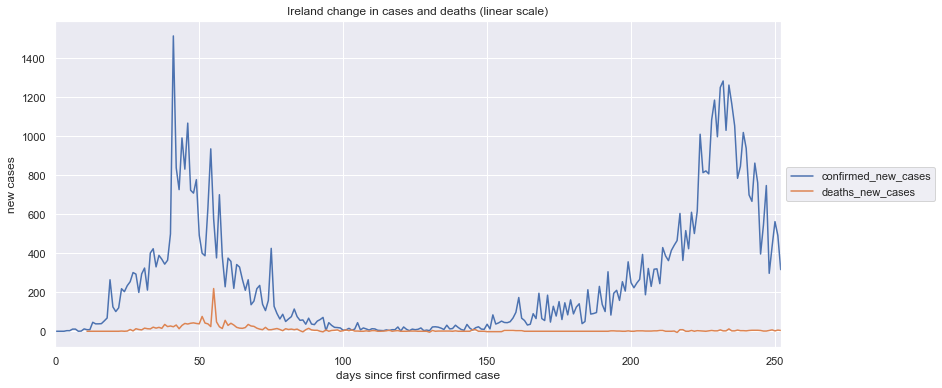

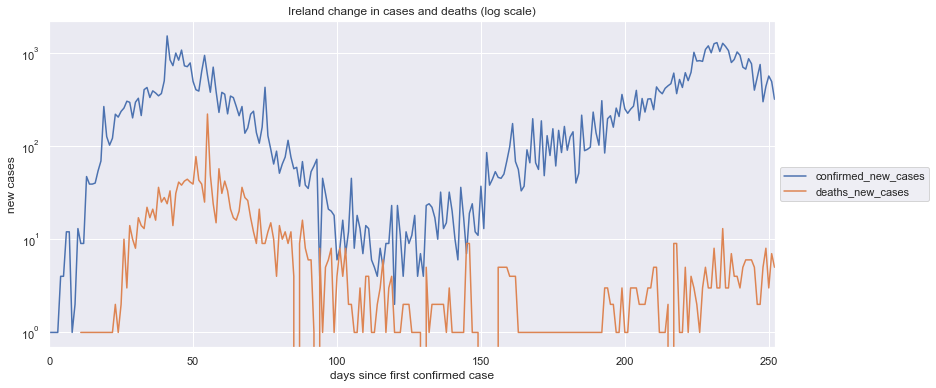

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
277    1073882   47250       NaN                     1.899486   
278    1099059   47742       NaN                     2.344485   
279    1123197   48120       NaN                     2.196242   
280    1146484   48475       NaN                     2.073278   
281    1171441   48888       NaN                     2.176829   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
277                                      257126.472624                 
278                                      317364.315712                 
279                                      297297.291315                 
280                                      280652.092585                 
281                                      294669.412461                 

     deaths_percentage_change  \
277                  0.847331   
278                  1.041270   
279                  0.791756   
280                  0.737739   
281                  0.851986   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
277                                      114700.095400           
278                                      140952.884002           
279                                      107177.066941           
280                                       99865.024009           
281                                      115330.164179           

     confirmed_new_cases  deaths_new_cases  
277              20018.0             397.0  
278              25177.0             492.0  
279              24138.0             378.0  
280              23287.0             355.0  
281              24957.0             413.0

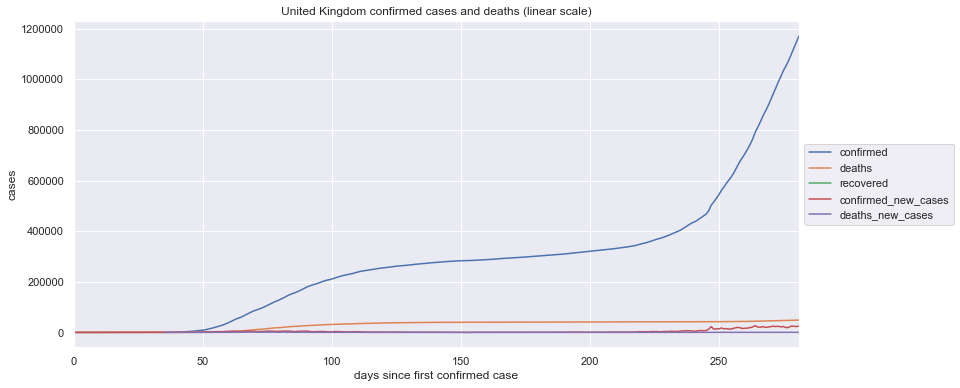

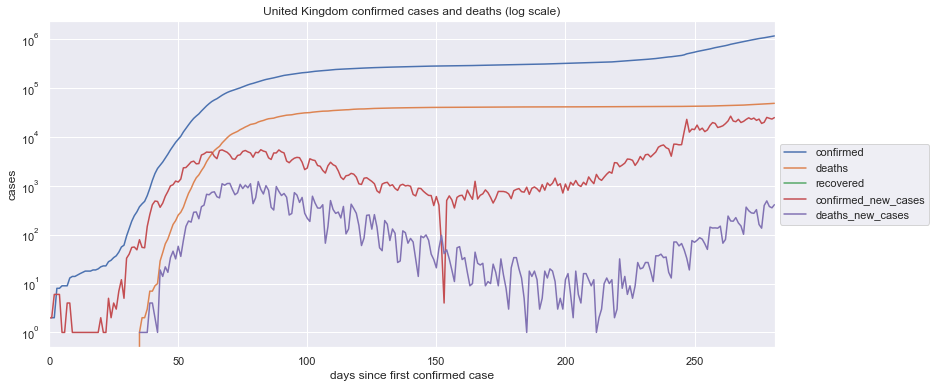

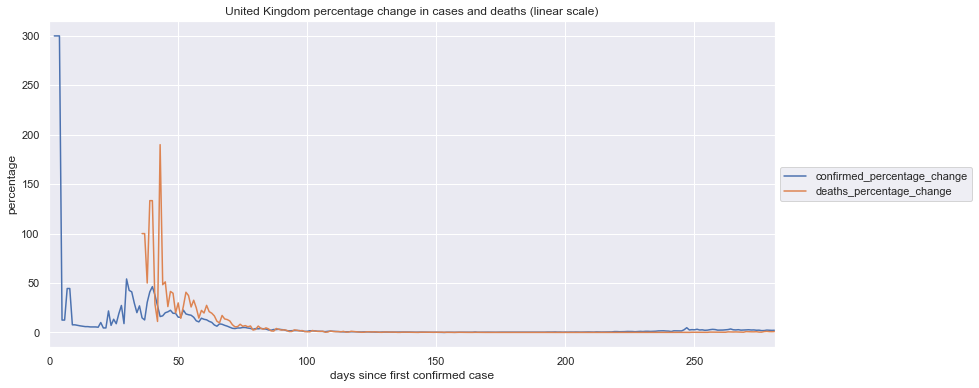

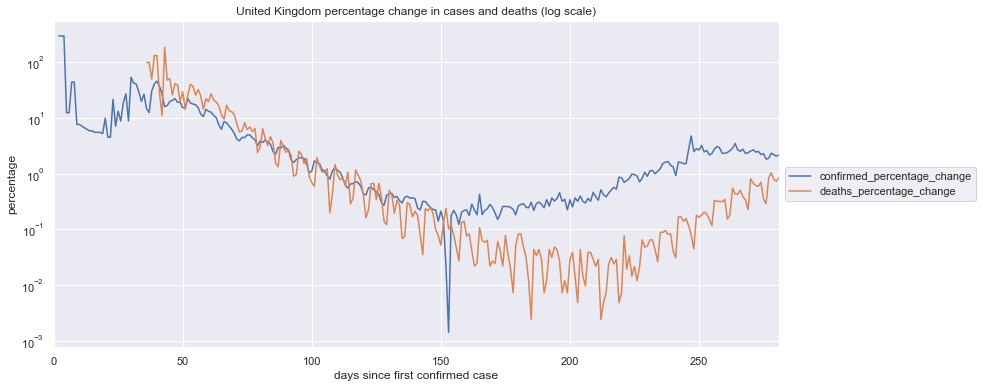

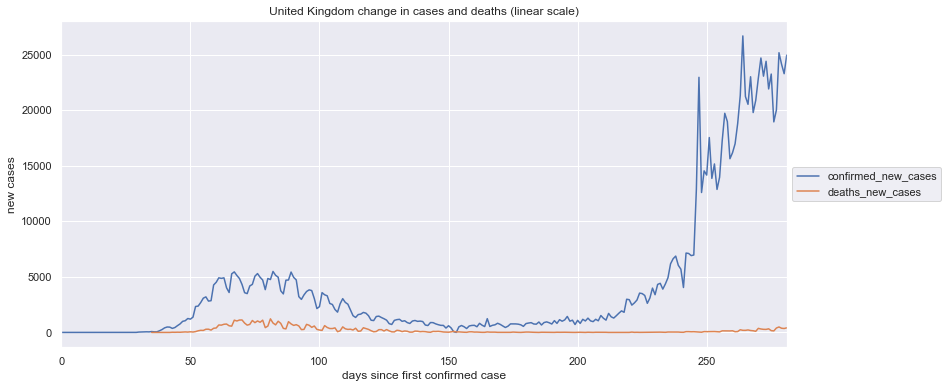

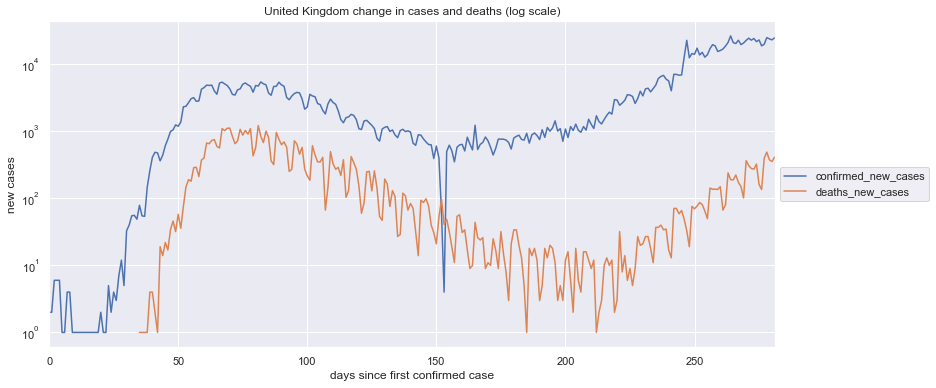

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
281     577131   10717       NaN                     1.322512   
282     608611   10949       NaN                     5.454568   
283     631172   11110       NaN                     3.706966   
284     653992   11240       NaN                     3.615496   
285     668114   11306       NaN                     2.159354   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
281                                      120093.146439                 
282                                      495312.208718                 
283                                      336617.941453                 
284                                      328311.902188                 
285                                      196084.146925                 

     deaths_percentage_change  \
281                  0.449902   
282                  2.164785   
283                  1.470454   
284                  1.170117   
285                  0.587189   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
281                                       40854.155164           
282                                      196577.345368           
283                                      133527.319870           
284                                      106254.664693           
285                                       53320.760630           

     confirmed_new_cases  deaths_new_cases  
281               7533.0              48.0  
282              31480.0             232.0  
283              22561.0             161.0  
284              22820.0             130.0  
285              14122.0              66.0

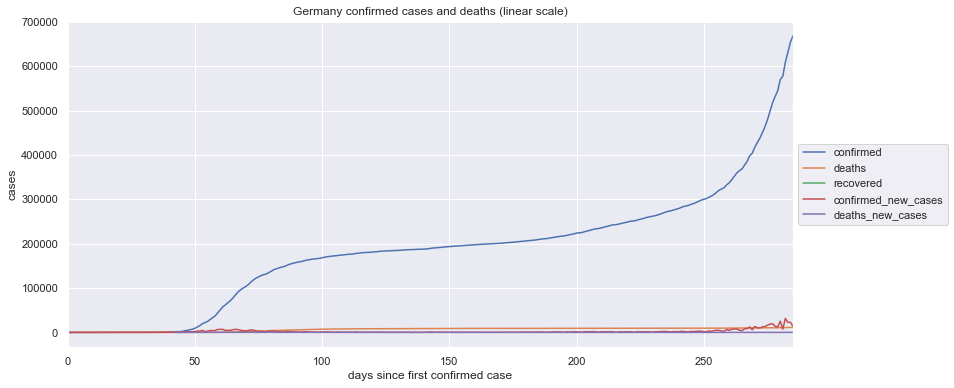

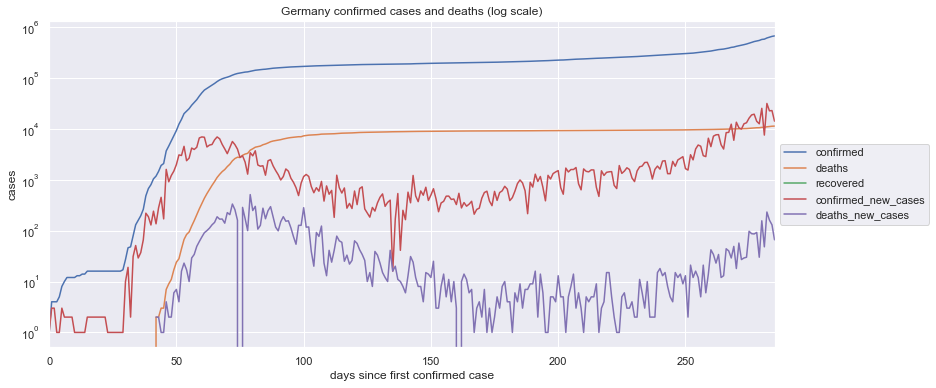

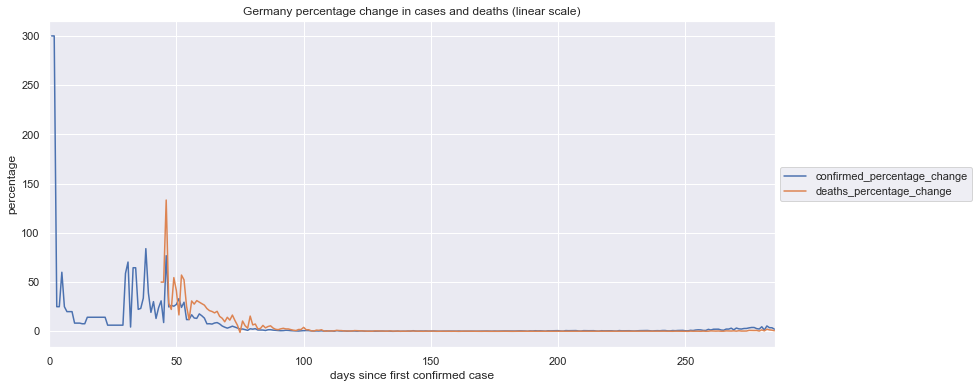

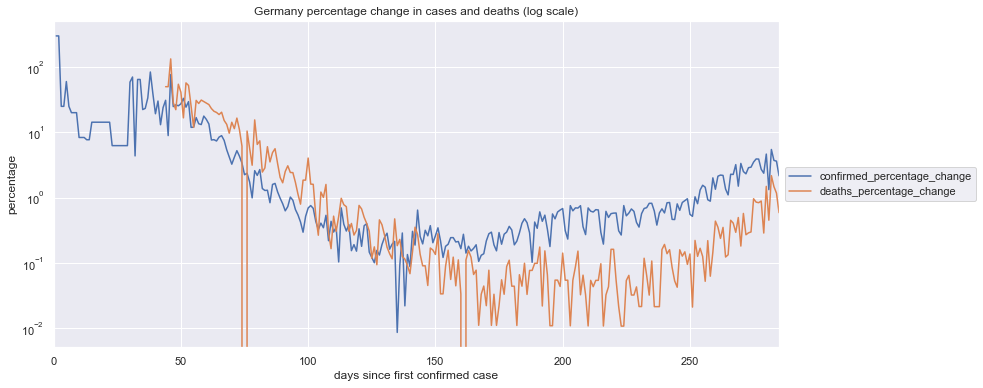

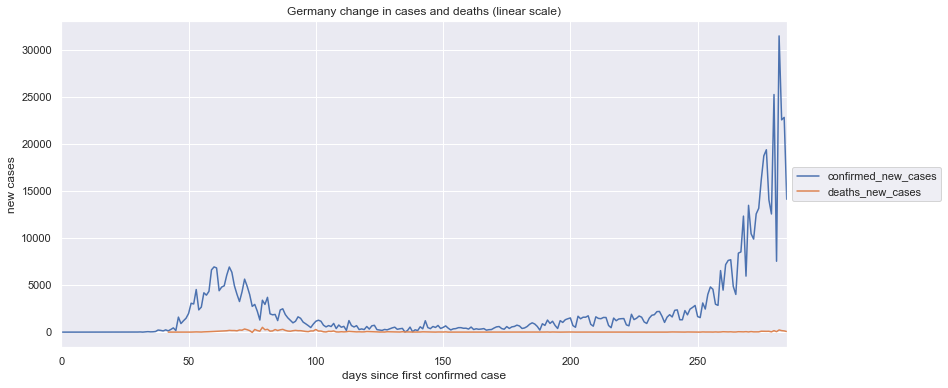

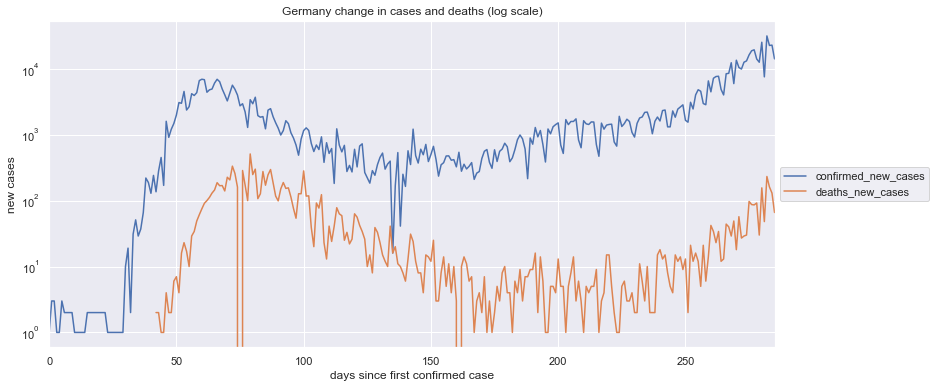

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
277     759829   39412       NaN                     3.860233   
278     790377   39764       NaN                     4.020378   
279     824879   40192       NaN                     4.365259   
280     862681   40638       NaN                     4.582733   
281     902490   41063       NaN                     4.614568   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
277                                      419614.482882                 
278                                      437022.592187                 
279                                      474511.725783                 
280                                      498151.568648                 
281                                      501612.103335                 

     deaths_percentage_change  \
277                  0.903761   
278                  0.893129   
279                  1.076350   
280                  1.109674   
281                  1.045819   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
277                                       98240.498386           
278                                       97084.782314           
279                                      117001.296896           
280                                      120623.579721           
281                                      113682.489592           

     confirmed_new_cases  deaths_new_cases  
277              28241.0             353.0  
278              30548.0             352.0  
279              34502.0             428.0  
280              37802.0             446.0  
281              39809.0             425.0

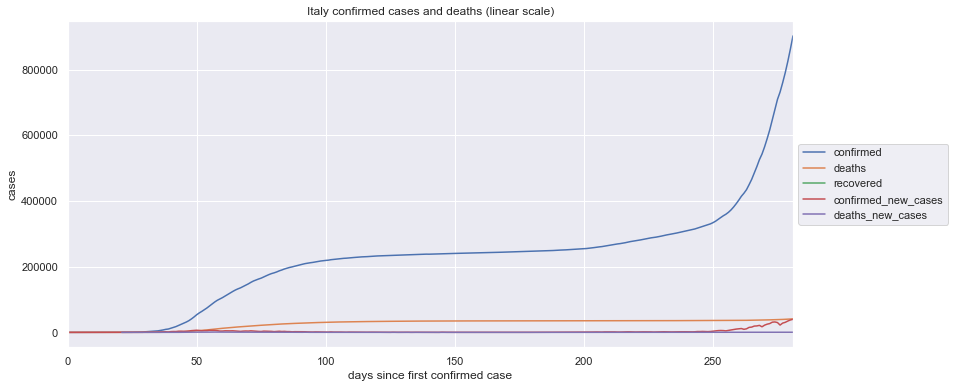

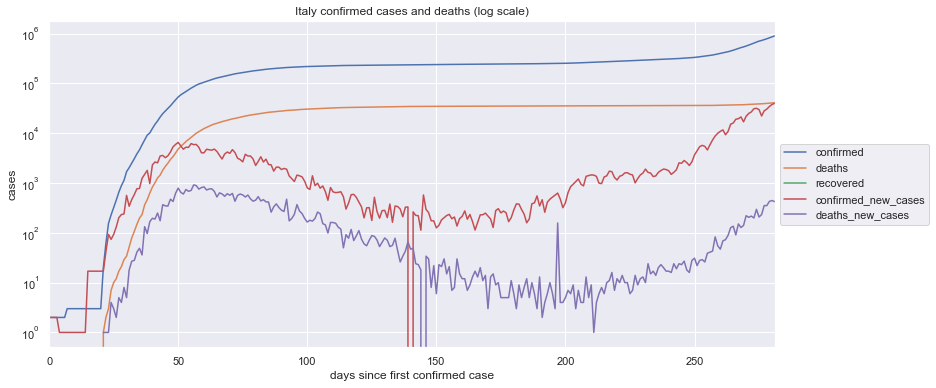

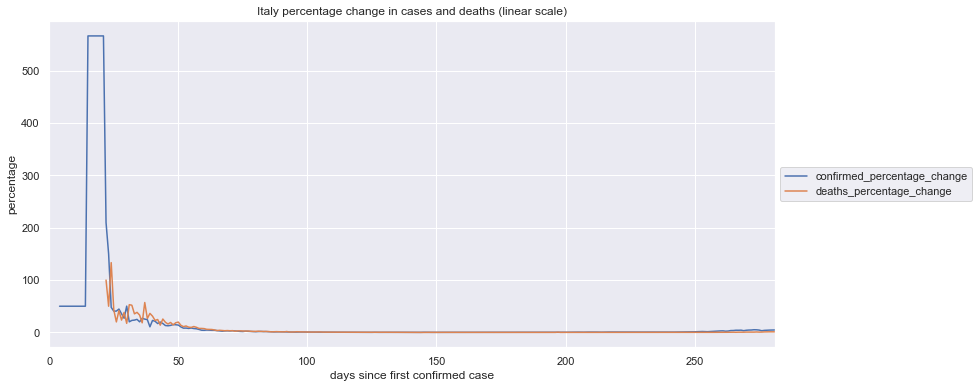

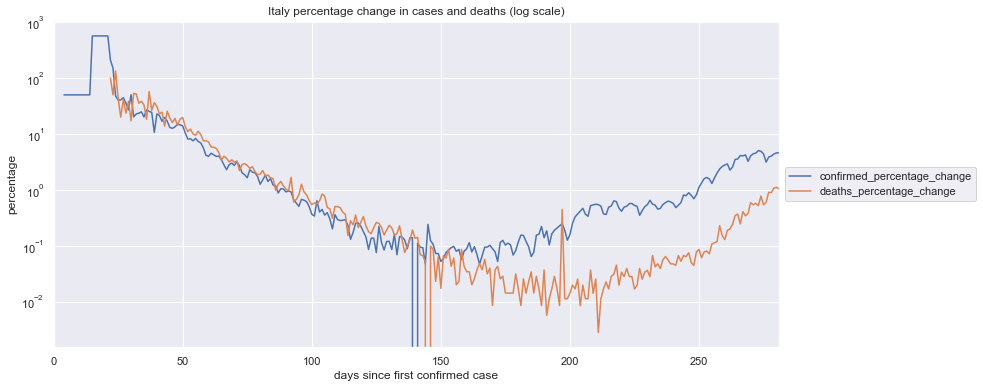

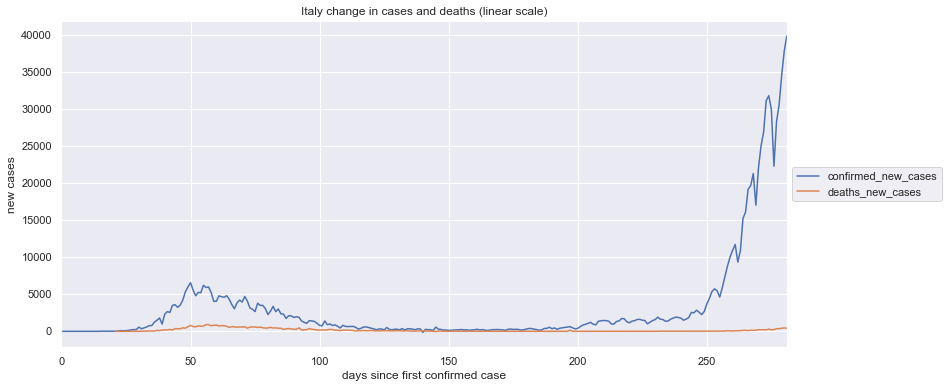

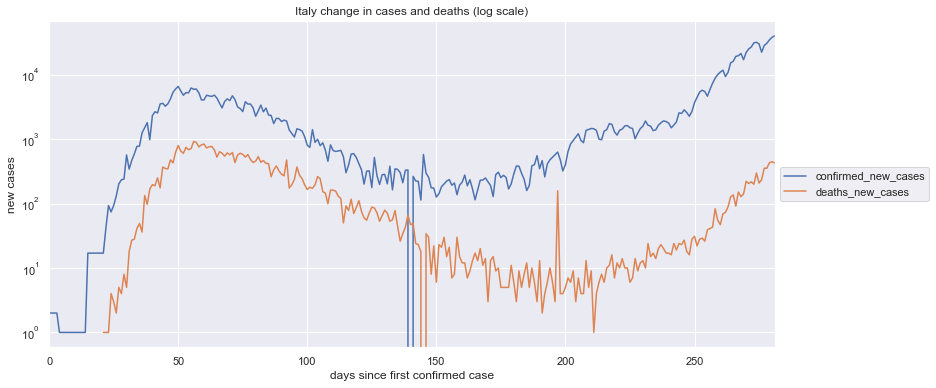

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
286    9382617  232620       NaN                     0.985138   
287    9485448  233717       NaN                     1.095974   
288    9607336  234927       NaN                     1.285000   
289    9733816  236073       NaN                     1.316494   
290    9860558  237113       NaN                     1.302079   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
286                                       1.566300e+06                 
287                                       1.742521e+06                 
288                                       2.043060e+06                 
289                                       2.093133e+06                 
290                                       2.070215e+06                 

     deaths_percentage_change  \
286                  0.488142   
287                  0.471585   
288                  0.517720   
289                  0.487811   
290                  0.440542   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
286                                      776111.536210           
287                                      749786.309893           
288                                      823138.656405           
289                                      775585.382206           
290                                      700430.341229           

     confirmed_new_cases  deaths_new_cases  
286              91530.0            1130.0  
287             102831.0            1097.0  
288             121888.0            1210.0  
289             126480.0            1146.0  
290             126742.0            1040.0

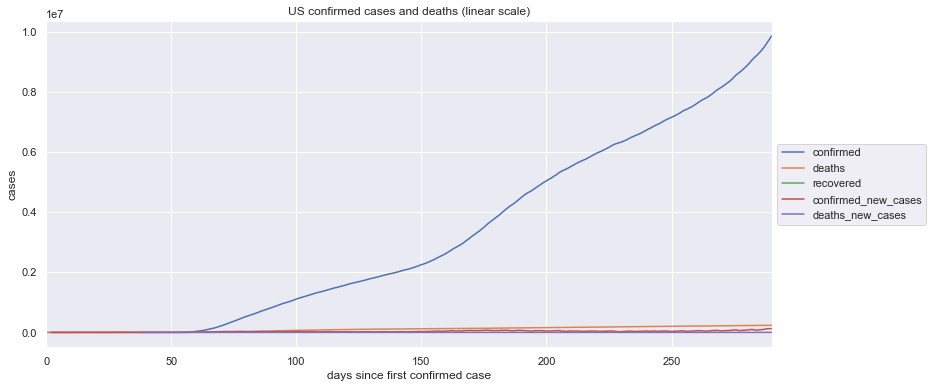

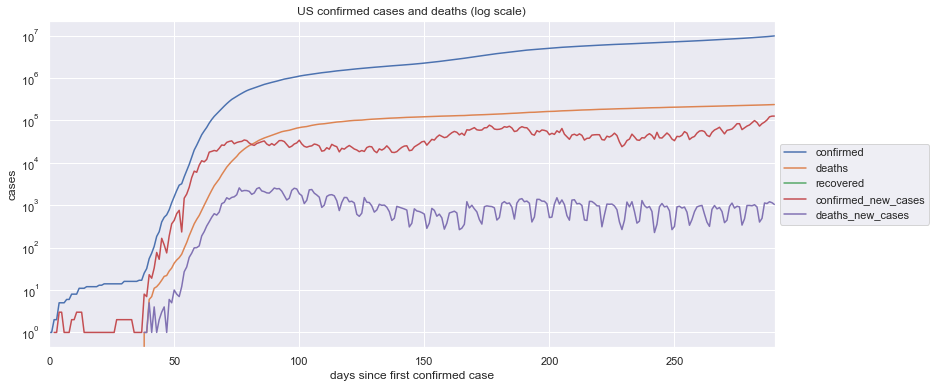

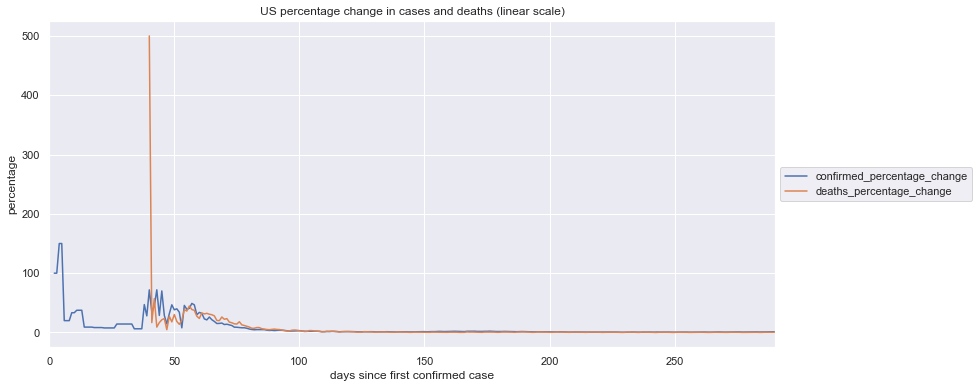

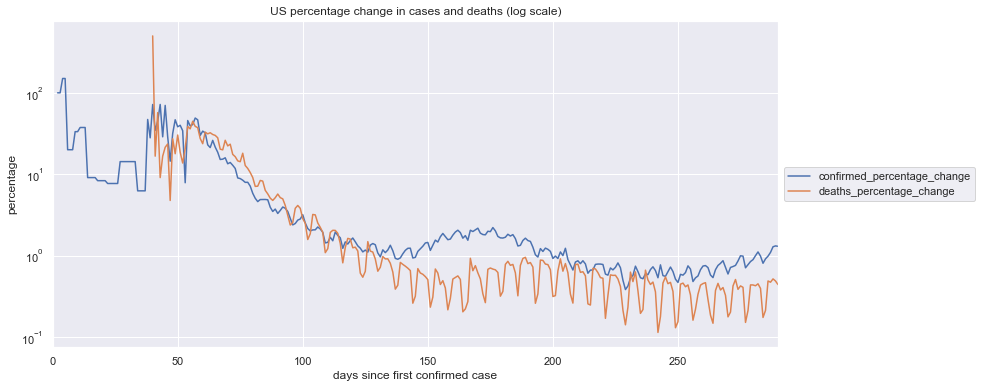

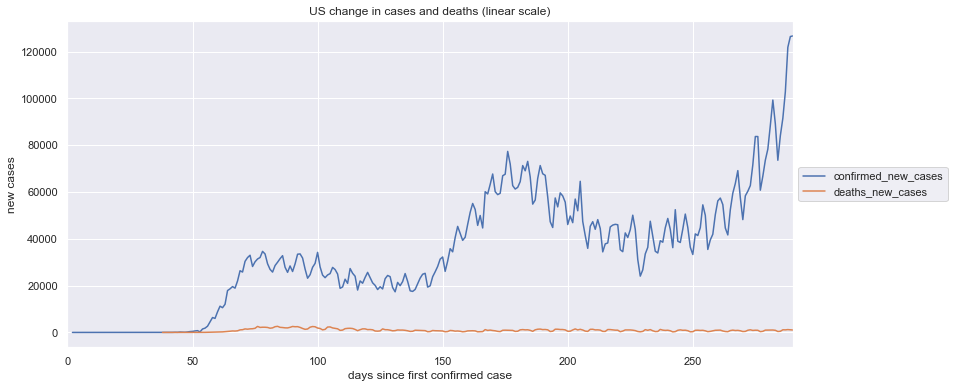

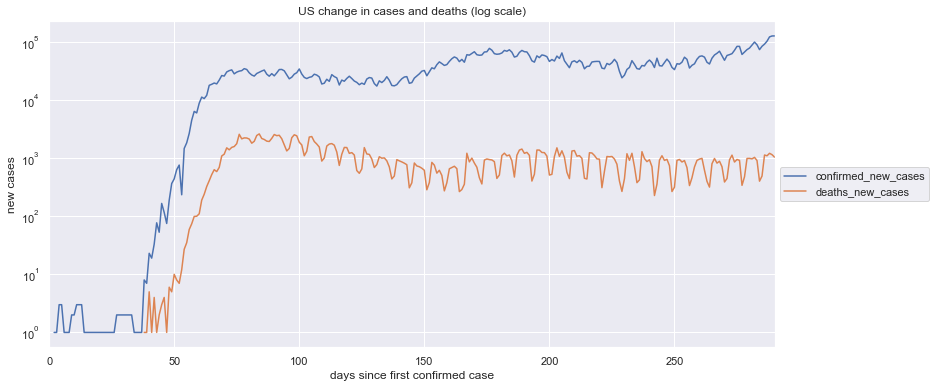

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Mongolia

confirmed  deaths recovered  confirmed_percentage_change  \
238        352       0       NaN                     0.571429   
239        353       0       NaN                     0.284091   
240        356       0       NaN                     0.849858   
241        357       0       NaN                     0.280899   
242        357       0       NaN                          NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
238                                          48.352479                 
239                                          24.038875                 
240                                          71.912327                 
241                                          23.768775                 
242                                                NaN                 

     deaths_percentage_change  \
238                       NaN   
239                       NaN   
240                       NaN   
241                       NaN   
242                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
238                                                NaN           
239                                                NaN           
240                                                NaN           
241                                                NaN           
242                                                NaN           

     confirmed_new_cases  deaths_new_cases  
238                  2.0               NaN  
239                  1.0               NaN  
240                  3.0               NaN  
241                  1.0               NaN  
242                  NaN               NaN

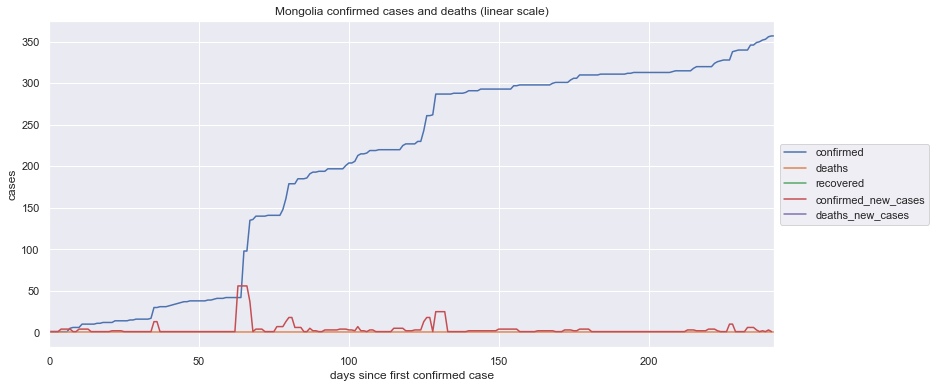

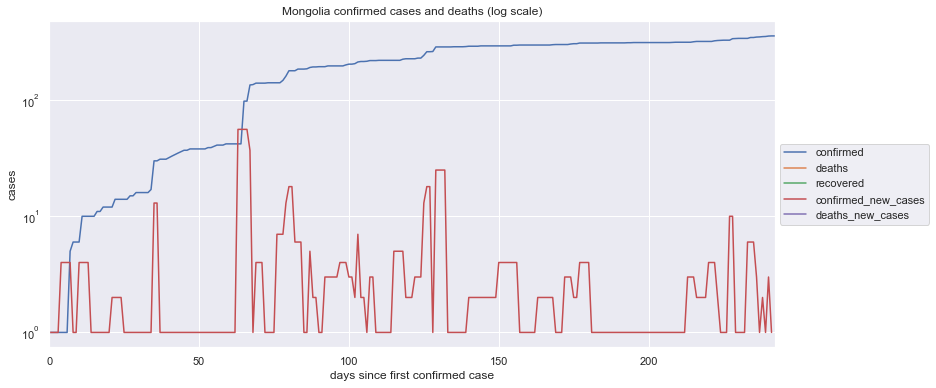

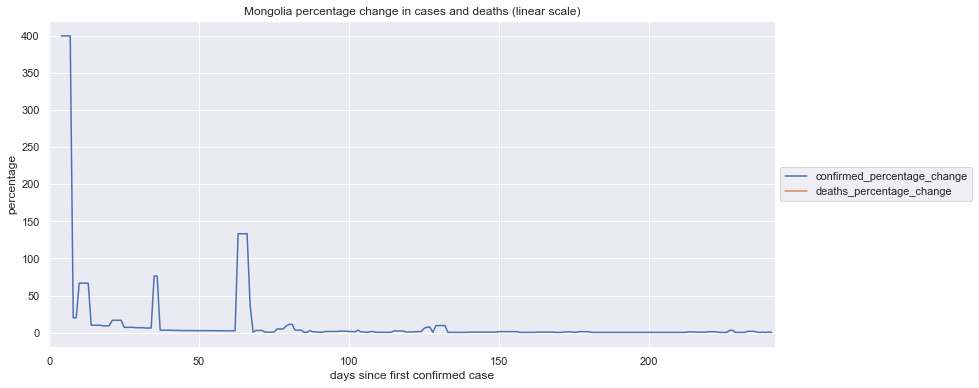

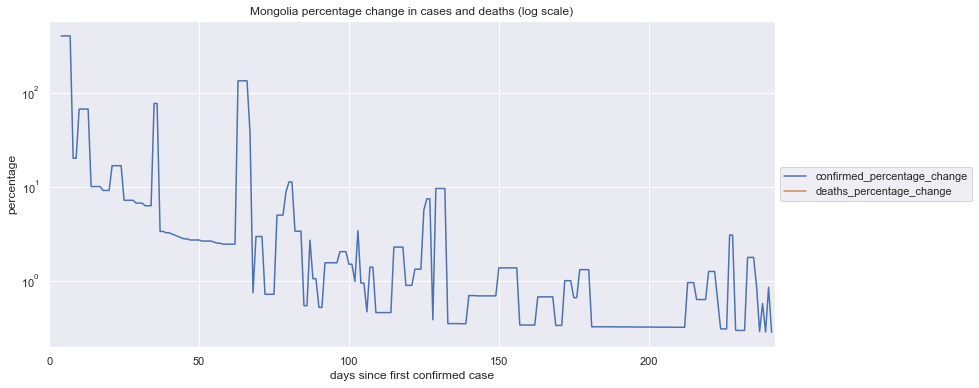

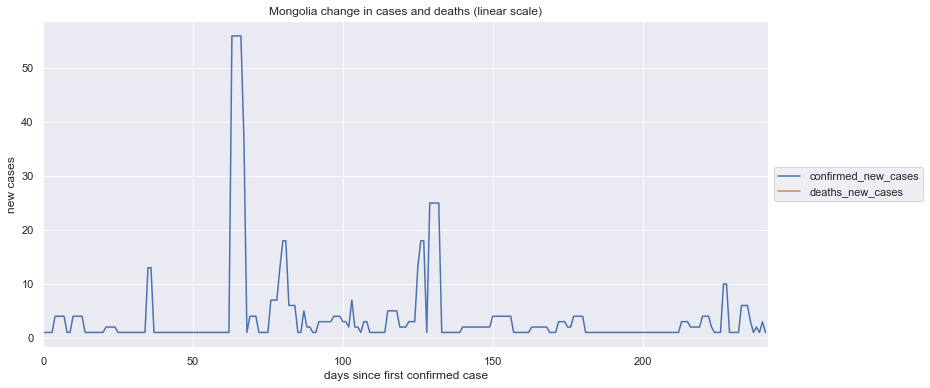

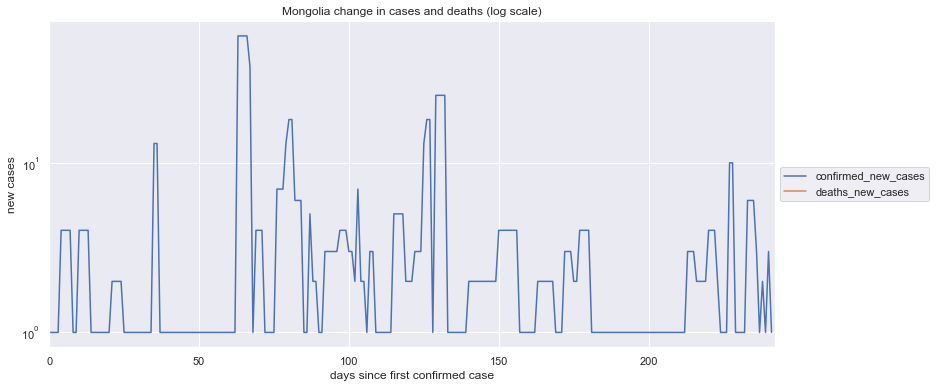

In [20]:
location_name = 'Mongolia'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# South Africa

confirmed  deaths recovered  confirmed_percentage_change  \
243     728836   19539       NaN                     0.170562   
244     730548   19585       NaN                     0.234895   
245     732414   19677       NaN                     0.255425   
246     734175   19749       NaN                     0.240438   
247     735906   19789       NaN                     0.235775   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
243                                       22695.534065                 
244                                       31255.919215                 
245                                       33987.656051                 
246                                       31993.448199                 
247                                       31372.982505                 

     deaths_percentage_change  \
243                  0.380170   
244                  0.235427   
245                  0.469747   
246                  0.365909   
247                  0.202542   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
243                                       50586.617729           
244                                       31326.640999           
245                                       62506.125963           
246                                       48689.121896           
247                                       26950.896291           

     confirmed_new_cases  deaths_new_cases  
243               1241.0              74.0  
244               1712.0              46.0  
245               1866.0              92.0  
246               1761.0              72.0  
247               1731.0              40.0

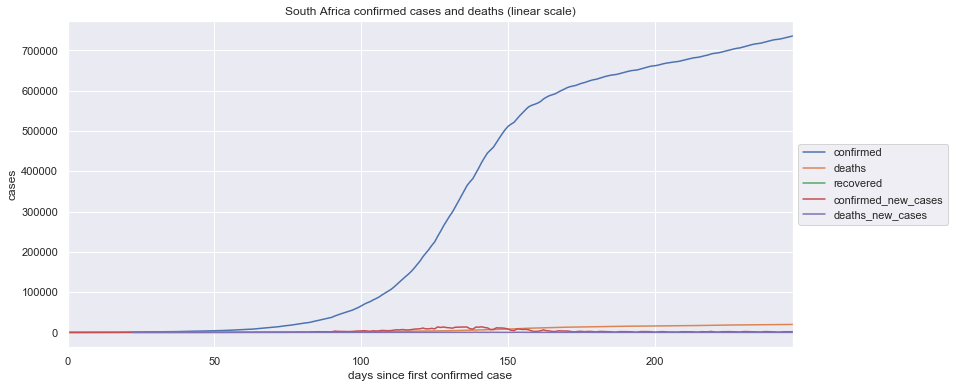

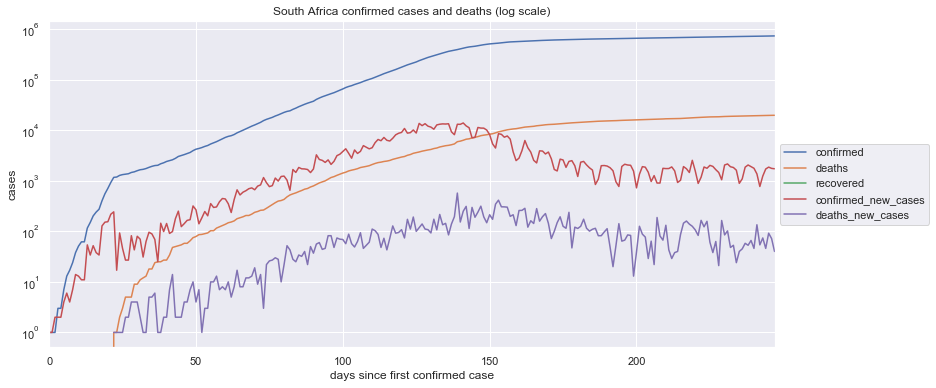

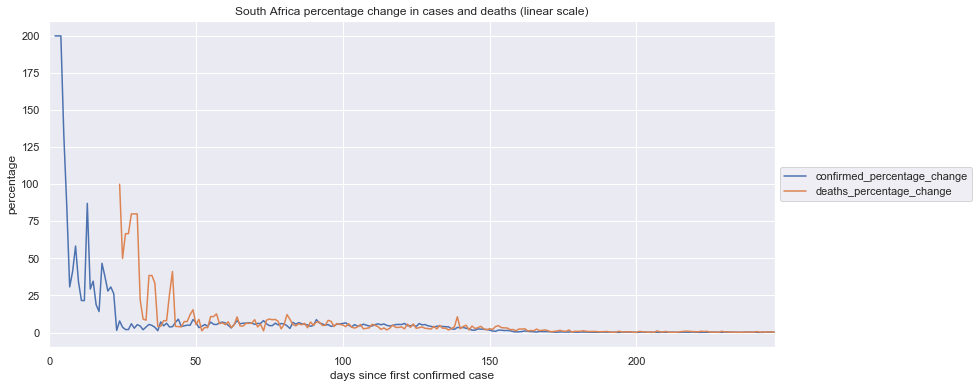

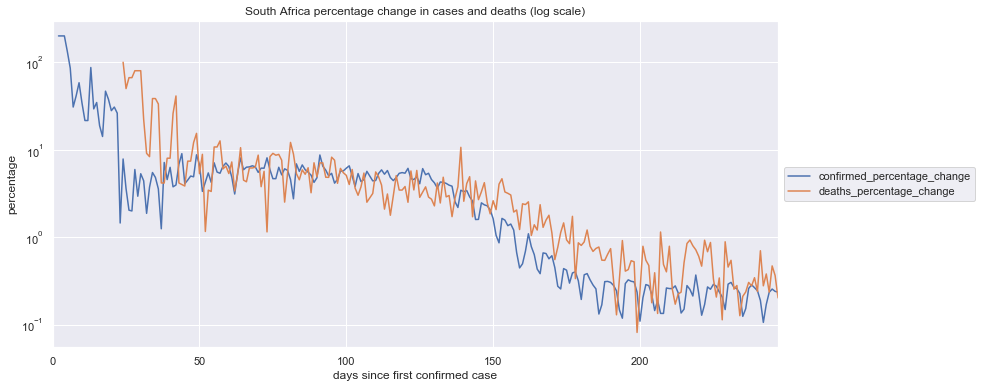

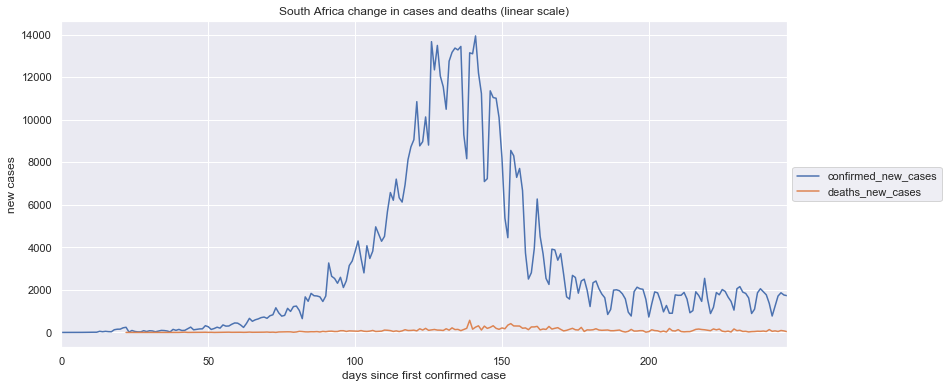

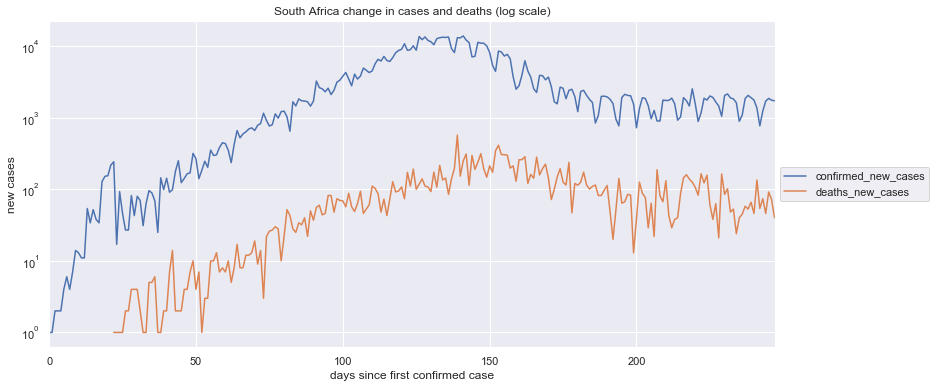

In [21]:
location_name = 'South Africa'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [22]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']
Mongolia                 = locations['Mongolia']
South_Africa             = locations['South Africa']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland,
                            Mongolia,
                            South_Africa]

In [23]:
#South_Korea

In [24]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                 Mongolia.add_suffix('_Mongolia'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                         South_Africa.add_suffix('_South_Africa'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
286                  26925                 474                   NaN   
287                  27050                 475                   NaN   
288                  27195                 476                   NaN   
289                  27284                 477                   NaN   
290                  27427                 478                   NaN   

     confirmed_percentage_change_South_Korea  \
286                                 0.440184   
287                                 0.464253   
288                                 0.536044   
289                                 0.327266   
290                                 0.524117   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
286                                        2914.266097                             
287                                        3073.616735                             
288                                        3548.919463                             
289                                        2166.687883                             
290                                        3469.951524                             

     deaths_percentage_change_South_Korea  \
286                              0.423729   
287                              0.210970   
288                              0.210526   
289                              0.210084   
290                              0.209644   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
286                                        2805.326460                       
287                                        1396.744820                       
288                                        1393.804305                       
289                                        1390.876144                       
290                                        1387.960261                       

     confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
286                            118.0                           2.0   
287                            125.0                           1.0   
288                            145.0                           1.0   
289                             89.0                           1.0   
290                            143.0                           1.0   

     confirmed_Sweden  deaths_Sweden recovered_Sweden  \
286               NaN            NaN              NaN   
287               NaN            NaN              NaN   
288               NaN            NaN              NaN   
289               NaN            NaN              NaN   
290               NaN            NaN              NaN   

     confirmed_percentage_change_Sweden  \
286                                 NaN   
287                                 NaN   
288                                 NaN   
289                                 NaN   
290                                 NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
286                                                NaN                        
287                                                NaN                        
288                                                NaN                        
289                                                NaN                        
290                                                NaN                        

     deaths_percentage_change_Sweden  \
286                              NaN   
287                              NaN   
288                              NaN   
289                              NaN   
290                              NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
286                                                NaN                  
287                                                NaN                  
288                                                NaN                  
289    

# comparisons: confirmed cases

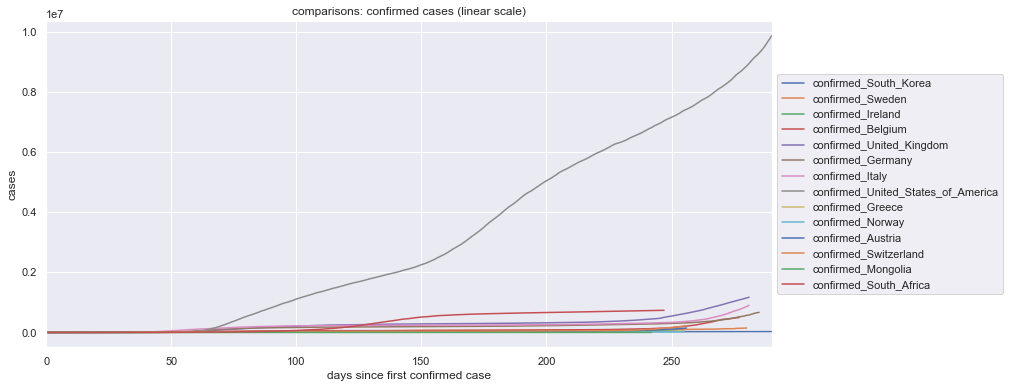

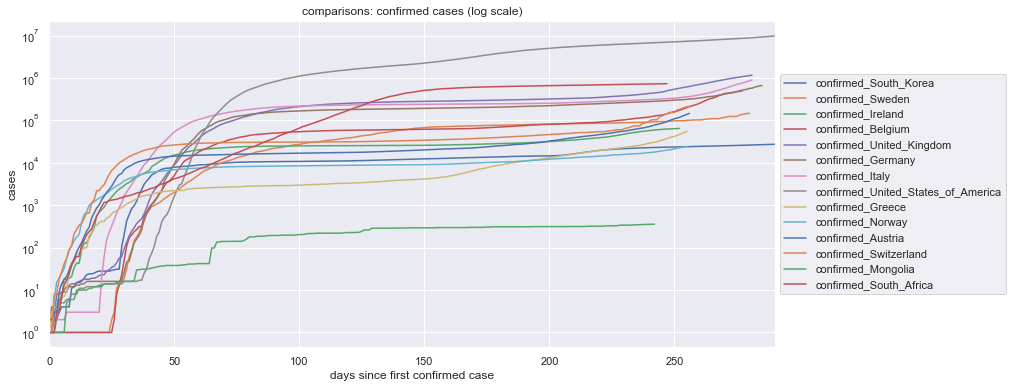

In [25]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland',
    'confirmed_Mongolia',
    'confirmed_South_Africa']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

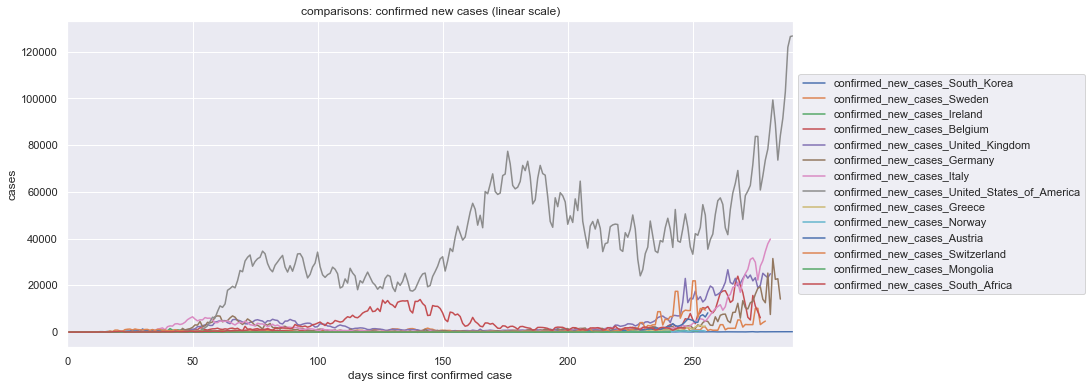

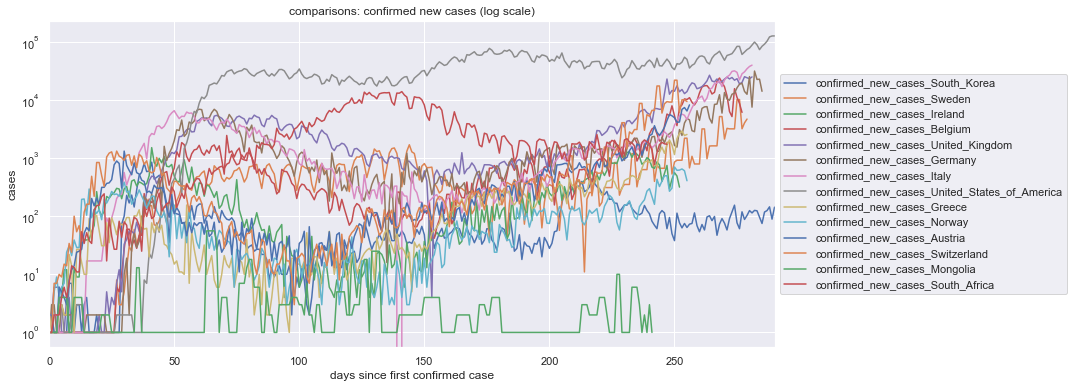

In [26]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland',
    'confirmed_new_cases_Mongolia',
    'confirmed_new_cases_South_Africa']]

title = 'comparisons: confirmed new cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

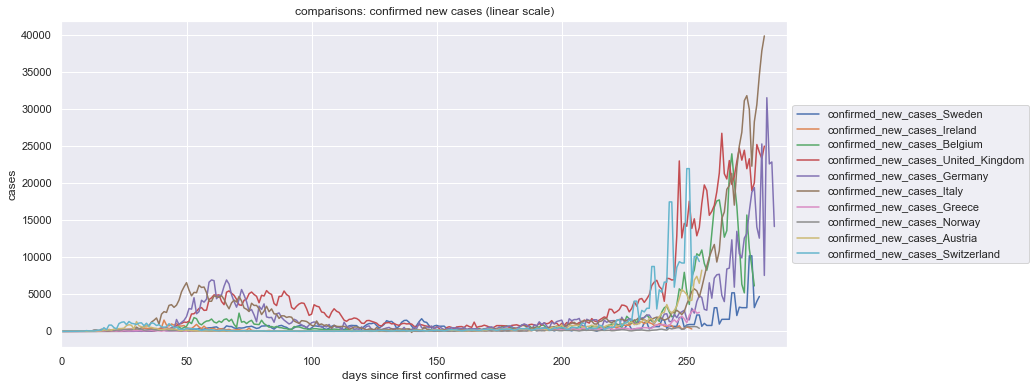

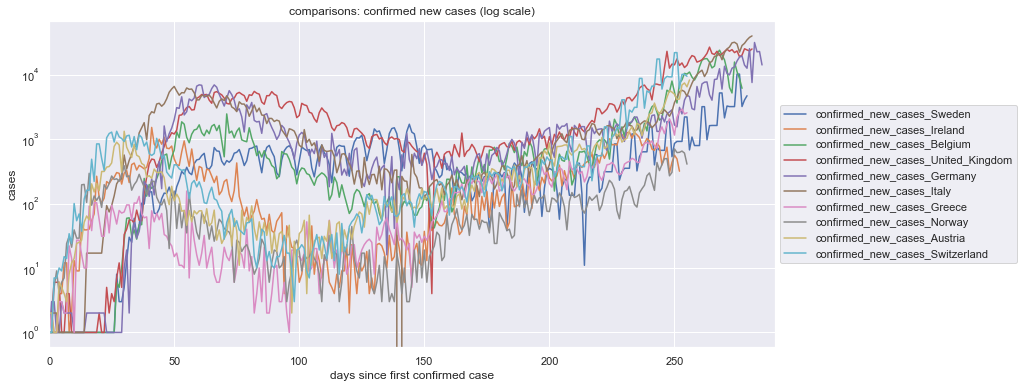

In [27]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed new cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
286                 474            NaN             NaN             NaN   
287                 475            NaN             NaN             NaN   
288                 476            NaN             NaN             NaN   
289                 477            NaN             NaN             NaN   
290                 478            NaN             NaN             NaN   

     deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
286                    NaN             NaN           NaN   
287                    NaN             NaN           NaN   
288                    NaN             NaN           NaN   
289                    NaN             NaN           NaN   
290                    NaN             NaN           NaN   

     deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
286                           232620            NaN            NaN   
287                           233717            NaN            NaN   
288                           234927            NaN            NaN   
289                           236073            NaN            NaN   
290                           237113            NaN            NaN   

     deaths_Austria  deaths_Switzerland  deaths_Mongolia  
286             NaN                 NaN              NaN  
287             NaN                 NaN              NaN  
288             NaN                 NaN              NaN  
289             NaN                 NaN              NaN  
290             NaN                 NaN              NaN

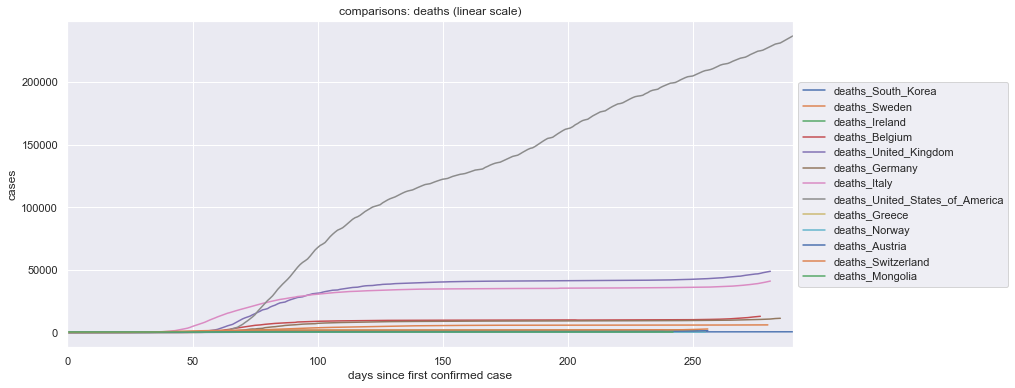

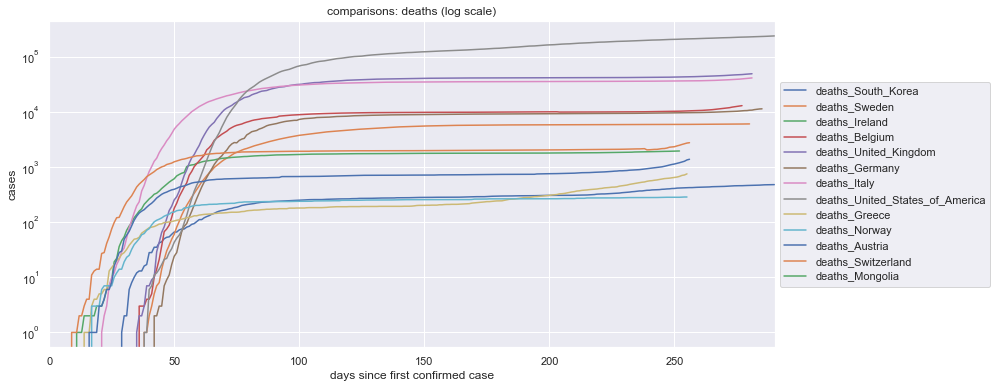

In [28]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland',
    'deaths_Mongolia']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
286            NaN             NaN             NaN                    NaN   
287            NaN             NaN             NaN                    NaN   
288            NaN             NaN             NaN                    NaN   
289            NaN             NaN             NaN                    NaN   
290            NaN             NaN             NaN                    NaN   

     deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
286             NaN           NaN            NaN            NaN   
287             NaN           NaN            NaN            NaN   
288             NaN           NaN            NaN            NaN   
289             NaN           NaN            NaN            NaN   
290             NaN           NaN            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
286             NaN                 NaN  
287             NaN                 NaN  
288             NaN                 NaN  
289             NaN                 NaN  
290             NaN                 NaN

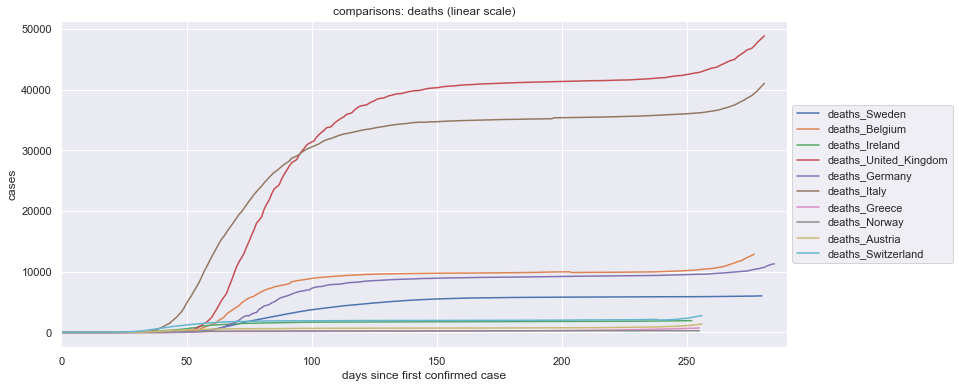

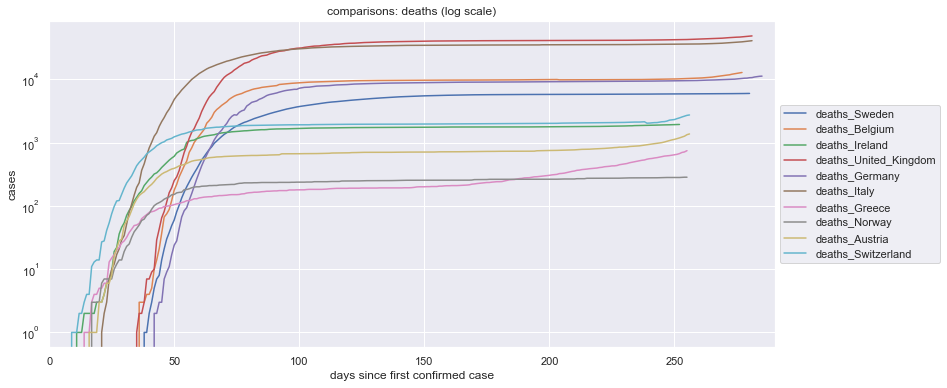

In [29]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
286                           2.0                      NaN   
287                           1.0                      NaN   
288                           1.0                      NaN   
289                           1.0                      NaN   
290                           1.0                      NaN   

     deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
286                       NaN                       NaN   
287                       NaN                       NaN   
288                       NaN                       NaN   
289                       NaN                       NaN   
290                       NaN                       NaN   

     deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
286                              NaN                       NaN   
287                              NaN                       NaN   
288                              NaN                       NaN   
289                              NaN                       NaN   
290                              NaN                       NaN   

     deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
286                     NaN                                     1130.0   
287                     NaN                                     1097.0   
288                     NaN                                     1210.0   
289                     NaN                                     1146.0   
290                     NaN                                     1040.0   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
286                      NaN                      NaN   
287                      NaN                      NaN   
288                      NaN                      NaN   
289                      NaN                      NaN   
290                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  \
286                       NaN                           NaN   
287                       NaN                           NaN   
288                       NaN                           NaN   
289                       NaN                           NaN   
290                       NaN                           NaN   

     deaths_new_cases_Mongolia  deaths_new_cases_South_Africa  
286                        NaN                            NaN  
287                        NaN                            NaN  
288                        NaN                            NaN  
289                        NaN                            NaN  
290                        NaN                            NaN

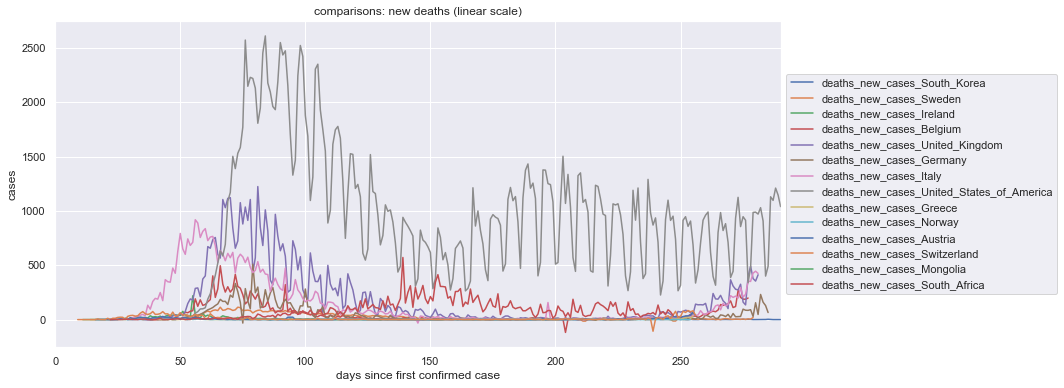

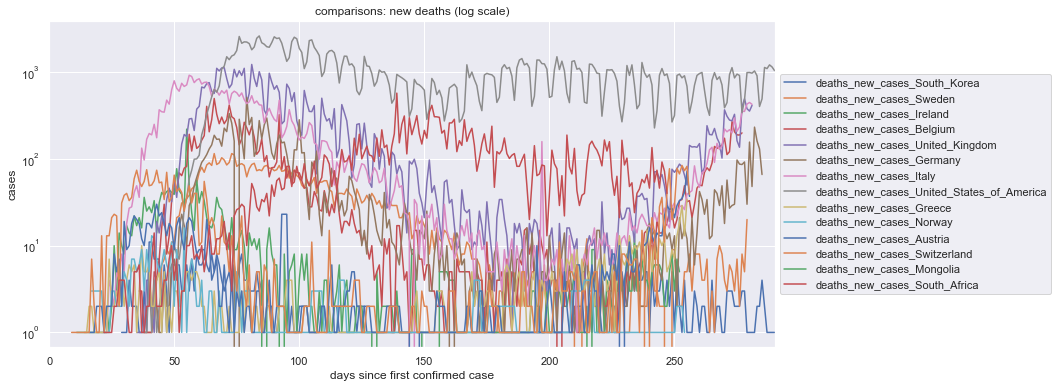

In [30]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland',
    'deaths_new_cases_Mongolia',
    'deaths_new_cases_South_Africa']]
display(__df.tail())

title = 'comparisons: new deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
286                      NaN                       NaN   
287                      NaN                       NaN   
288                      NaN                       NaN   
289                      NaN                       NaN   
290                      NaN                       NaN   

     deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
286                       NaN                              NaN   
287                       NaN                              NaN   
288                       NaN                              NaN   
289                       NaN                              NaN   
290                       NaN                              NaN   

     deaths_new_cases_Germany  deaths_new_cases_Italy  \
286                       NaN                     NaN   
287                       NaN                     NaN   
288                       NaN                     NaN   
289                       NaN                     NaN   
290                       NaN                     NaN   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
286                      NaN                      NaN   
287                      NaN                      NaN   
288                      NaN                      NaN   
289                      NaN                      NaN   
290                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
286                       NaN                           NaN  
287                       NaN                           NaN  
288                       NaN                           NaN  
289                       NaN                           NaN  
290                       NaN                           NaN

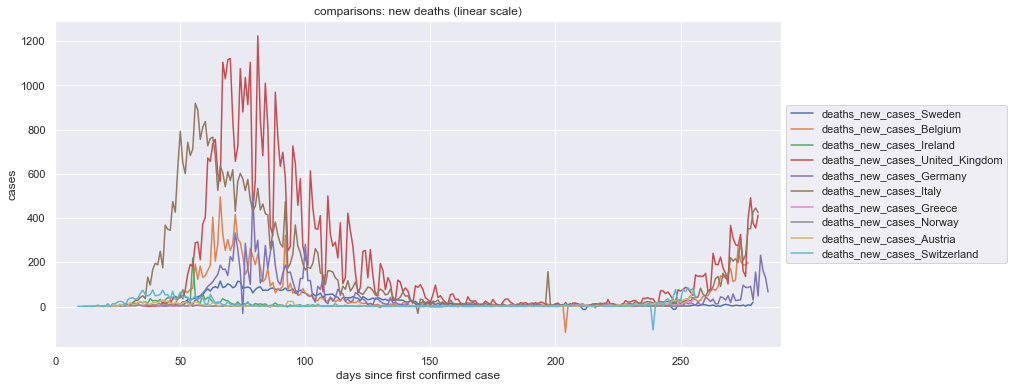

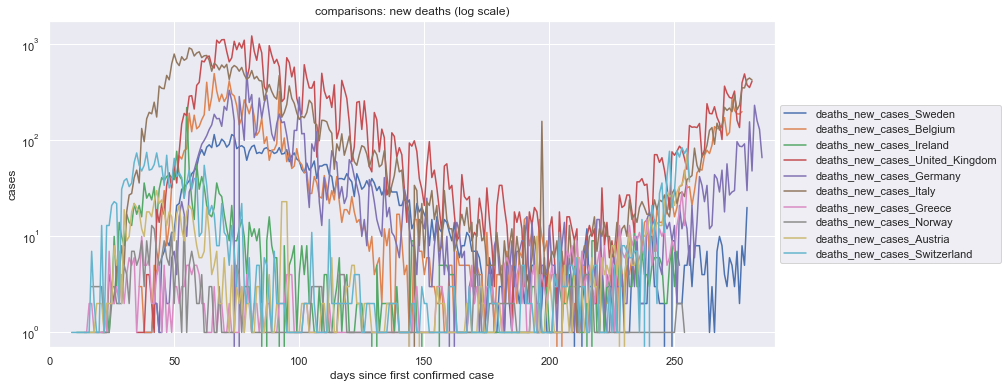

In [31]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: new deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
286                                 0.440184   
287                                 0.464253   
288                                 0.536044   
289                                 0.327266   
290                                 0.524117   

     confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
286                                 NaN                                  NaN   
287                                 NaN                                  NaN   
288                                 NaN                                  NaN   
289                                 NaN                                  NaN   
290                                 NaN                                  NaN   

     confirmed_percentage_change_Belgium  \
286                                  NaN   
287                                  NaN   
288                                  NaN   
289                                  NaN   
290                                  NaN   

     confirmed_percentage_change_United_Kingdom  \
286                                         NaN   
287                                         NaN   
288                                         NaN   
289                                         NaN   
290                                         NaN   

     confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
286                                  NaN                                NaN   
287                                  NaN                                NaN   
288                                  NaN                                NaN   
289                                  NaN                                NaN   
290                                  NaN                                NaN   

     confirmed_percentage_change_United_States_of_America  \
286                                           0.985138      
287                                           1.095974      
288                                           1.285000      
289                                           1.316494      
290                                           1.302079      

     confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
286                                 NaN                                 NaN   
287                                 NaN                                 NaN   
288                                 NaN                                 NaN   
289                                 NaN                                 NaN   
290                                 NaN                                 NaN   

     confirmed_percentage_change_Austria  \
286                                  NaN   
287                                  NaN   
288                                  NaN   
289                                  NaN   
290                                  NaN   

     confirmed_percentage_change_Switzerland  \
286                                      NaN   
287                                      NaN   
288                                      NaN   
289                                      NaN   
290                                      NaN   

     confirmed_percentage_change_Mongolia  \
286                                   NaN   
287                                   NaN   
288                                   NaN   
289                                   NaN   
290                                   NaN   

     confirmed_percentage_change_South_Africa  
286                                       NaN  
287                                       NaN  
288                                       NaN  
289                                       NaN  
290                                       NaN

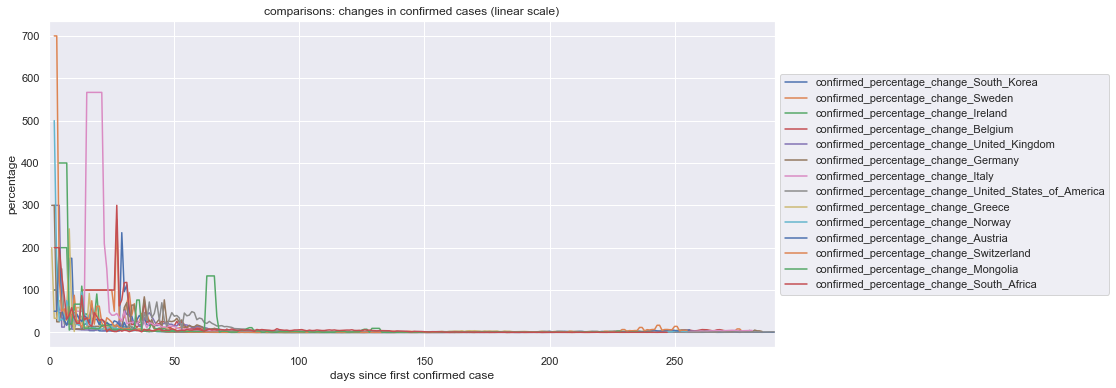

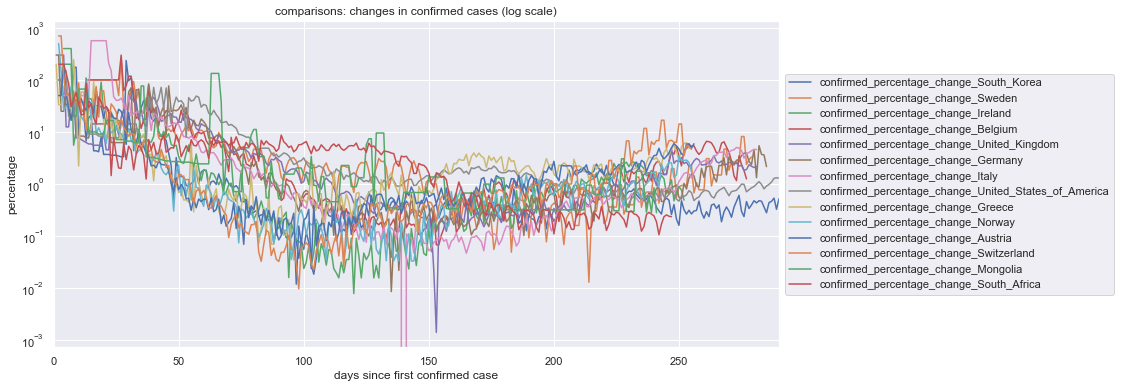

In [32]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland',
    'confirmed_percentage_change_Mongolia',
    'confirmed_percentage_change_South_Africa']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
286                              0.423729                              NaN   
287                              0.210970                              NaN   
288                              0.210526                              NaN   
289                              0.210084                              NaN   
290                              0.209644                              NaN   

     deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
286                               NaN                               NaN   
287                               NaN                               NaN   
288                               NaN                               NaN   
289                               NaN                               NaN   
290                               NaN                               NaN   

     deaths_percentage_change_United_Kingdom  \
286                                      NaN   
287                                      NaN   
288                                      NaN   
289                                      NaN   
290                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
286                               NaN                             NaN   
287                               NaN                             NaN   
288                               NaN                             NaN   
289                               NaN                             NaN   
290                               NaN                             NaN   

     deaths_percentage_change_United_States_of_America  \
286                                           0.488142   
287                                           0.471585   
288                                           0.517720   
289                                           0.487811   
290                                           0.440542   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
286                              NaN                              NaN   
287                              NaN                              NaN   
288                              NaN                              NaN   
289                              NaN                              NaN   
290                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  \
286                               NaN                                   NaN   
287                               NaN                                   NaN   
288                               NaN                                   NaN   
289                               NaN                                   NaN   
290                               NaN                                   NaN   

     deaths_percentage_change_Mongolia  deaths_percentage_change_South_Africa  
286                                NaN                                    NaN  
287                                NaN                                    NaN  
288                                NaN                                    NaN  
289                                NaN                                    NaN  
290                                NaN                                    NaN

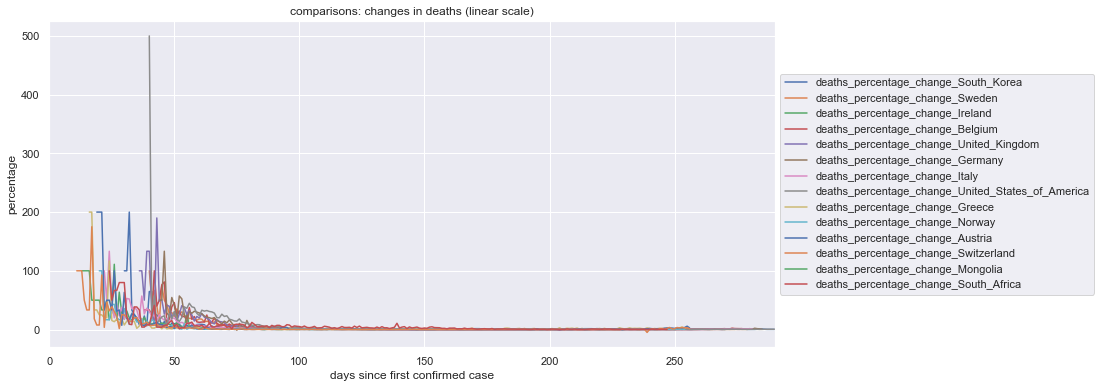

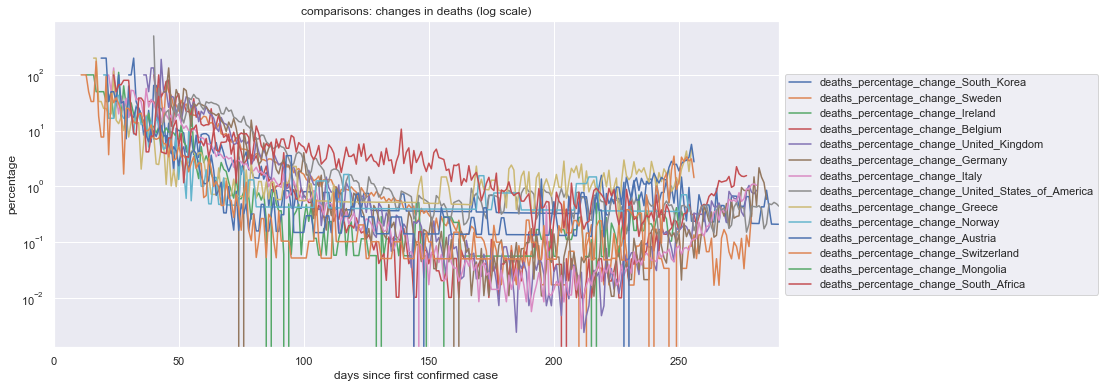

In [33]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland',
    'deaths_percentage_change_Mongolia',
    'deaths_percentage_change_South_Africa']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
286                              NaN                               NaN   
287                              NaN                               NaN   
288                              NaN                               NaN   
289                              NaN                               NaN   
290                              NaN                               NaN   

     deaths_percentage_change_Ireland  \
286                               NaN   
287                               NaN   
288                               NaN   
289                               NaN   
290                               NaN   

     deaths_percentage_change_United_Kingdom  \
286                                      NaN   
287                                      NaN   
288                                      NaN   
289                                      NaN   
290                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
286                               NaN                             NaN   
287                               NaN                             NaN   
288                               NaN                             NaN   
289                               NaN                             NaN   
290                               NaN                             NaN   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
286                              NaN                              NaN   
287                              NaN                              NaN   
288                              NaN                              NaN   
289                              NaN                              NaN   
290                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
286                               NaN                                   NaN  
287                               NaN                                   NaN  
288                               NaN                                   NaN  
289                               NaN                                   NaN  
290                               NaN                                   NaN

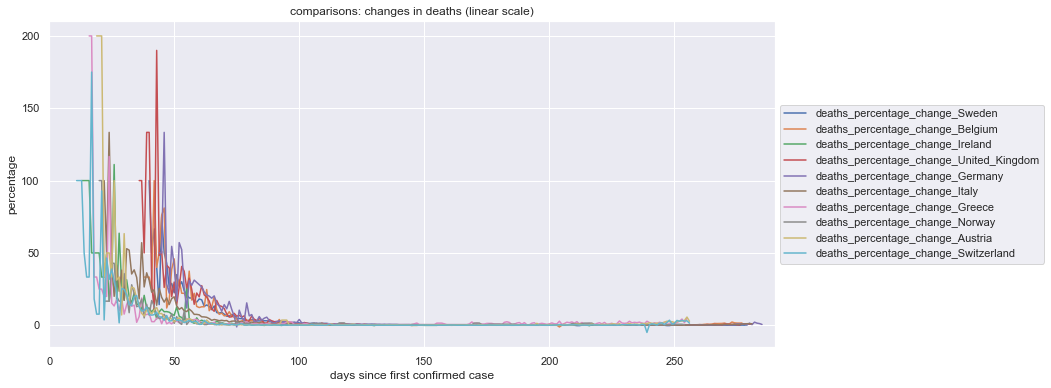

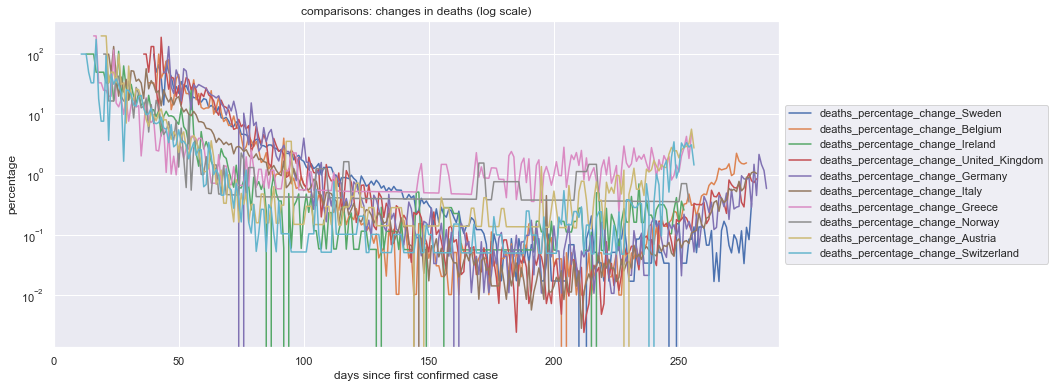

In [34]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');